<a href="https://www.kaggle.com/code/amirmoshkani/survive-space?scriptVersionId=233441738" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


### import data and inspect

In [2]:
import pandas as pd

# Load datasets
train_df = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
submission_df = pd.read_csv("/kaggle/input/spaceship-titanic/sample_submission.csv")

# Display columns
print("Train Columns:", train_df.columns.tolist())
print("Test Columns:", test_df.columns.tolist())
print("Submission Columns:", submission_df.columns.tolist())

# Show basic info
print("\nTrain Data Info:")
print(train_df.info())

print("\nTest Data Info:")
print(test_df.info())

print("\nSample Submission Info:")
print(submission_df.info())

# Show first few rows of each dataset
print("\nTrain Data Head:")
print(train_df.head())

print("\nTest Data Head:")
print(test_df.head())

print("\nSample Submission Head:")
print(submission_df.head())

# Summary statistics
print("\nTrain Data Description:")
print(train_df.describe())

print("\nTest Data Description:")
print(test_df.describe())


Train Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported']
Test Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name']
Submission Columns: ['PassengerId', 'Transported']

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   Sh

In [3]:
train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


### unique values 

In [4]:
unique_counts = {col: train_df[col].nunique() for col in train_df.columns}
sorted_unique_counts = dict(sorted(unique_counts.items(), key=lambda item: item[1], reverse=True))
sorted_unique_counts


{'PassengerId': 8693,
 'Name': 8473,
 'Cabin': 6560,
 'FoodCourt': 1507,
 'Spa': 1327,
 'VRDeck': 1306,
 'RoomService': 1273,
 'ShoppingMall': 1115,
 'Age': 80,
 'HomePlanet': 3,
 'Destination': 3,
 'CryoSleep': 2,
 'VIP': 2,
 'Transported': 2}

### missing values 

In [5]:
missing_counts = train_df.isnull().sum()
sorted_missing_counts = dict(missing_counts.sort_values(ascending=False))
sorted_missing_counts


{'CryoSleep': 217,
 'ShoppingMall': 208,
 'VIP': 203,
 'HomePlanet': 201,
 'Name': 200,
 'Cabin': 199,
 'VRDeck': 188,
 'FoodCourt': 183,
 'Spa': 183,
 'Destination': 182,
 'RoomService': 181,
 'Age': 179,
 'PassengerId': 0,
 'Transported': 0}

# EDA

## categorical

In [6]:
target = train_df['Transported']


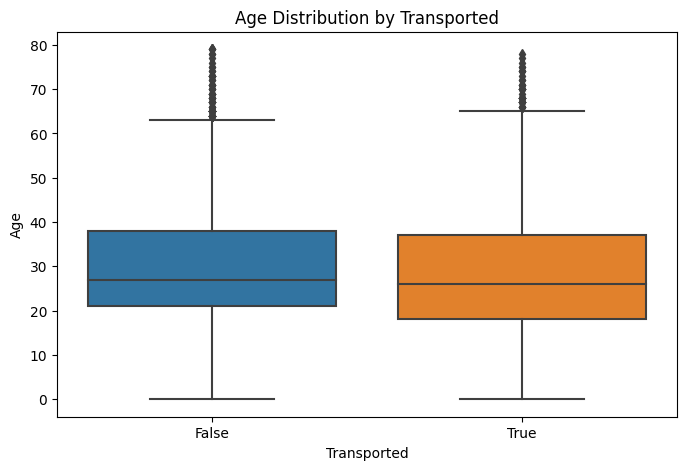

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x=target, y=train_df['Age'])
plt.title('Age Distribution by Transported')
plt.xlabel('Transported')
plt.ylabel('Age')
plt.show()


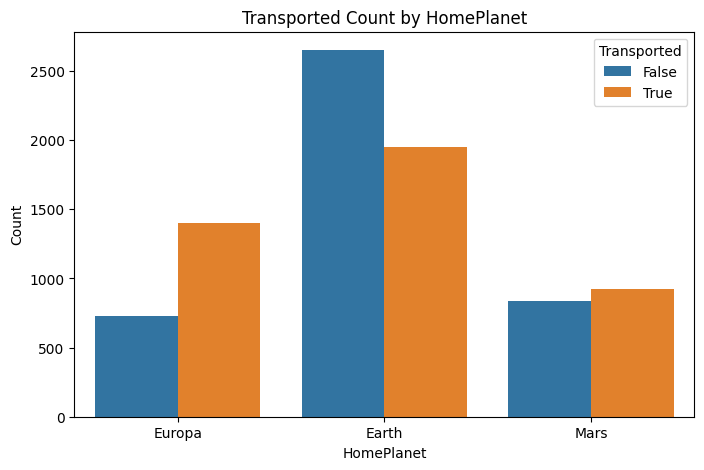

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='HomePlanet', hue='Transported')
plt.title('Transported Count by HomePlanet')
plt.xlabel('HomePlanet')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()


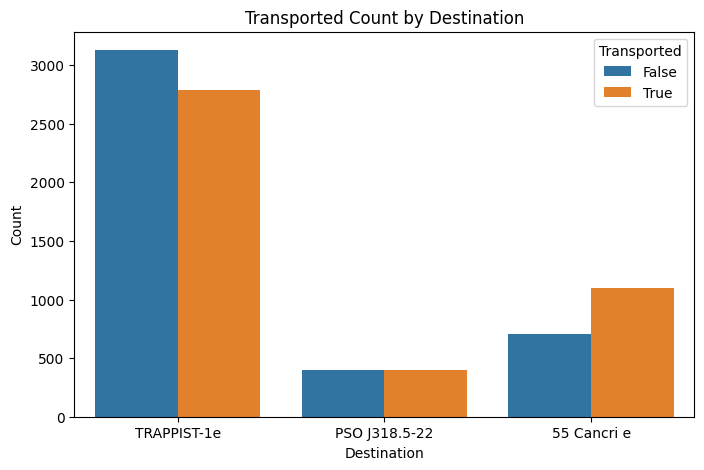

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='Destination', hue='Transported')
plt.title('Transported Count by Destination')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()


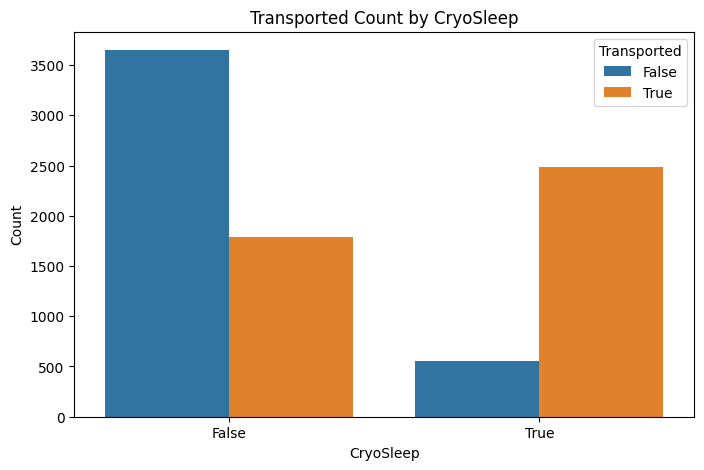

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='CryoSleep', hue='Transported')
plt.title('Transported Count by CryoSleep')
plt.xlabel('CryoSleep')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()


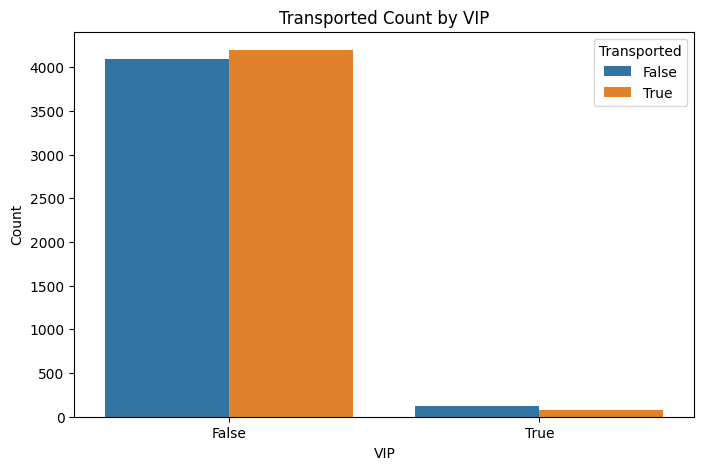

In [11]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='VIP', hue='Transported')
plt.title('Transported Count by VIP')
plt.xlabel('VIP')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()


## numerical

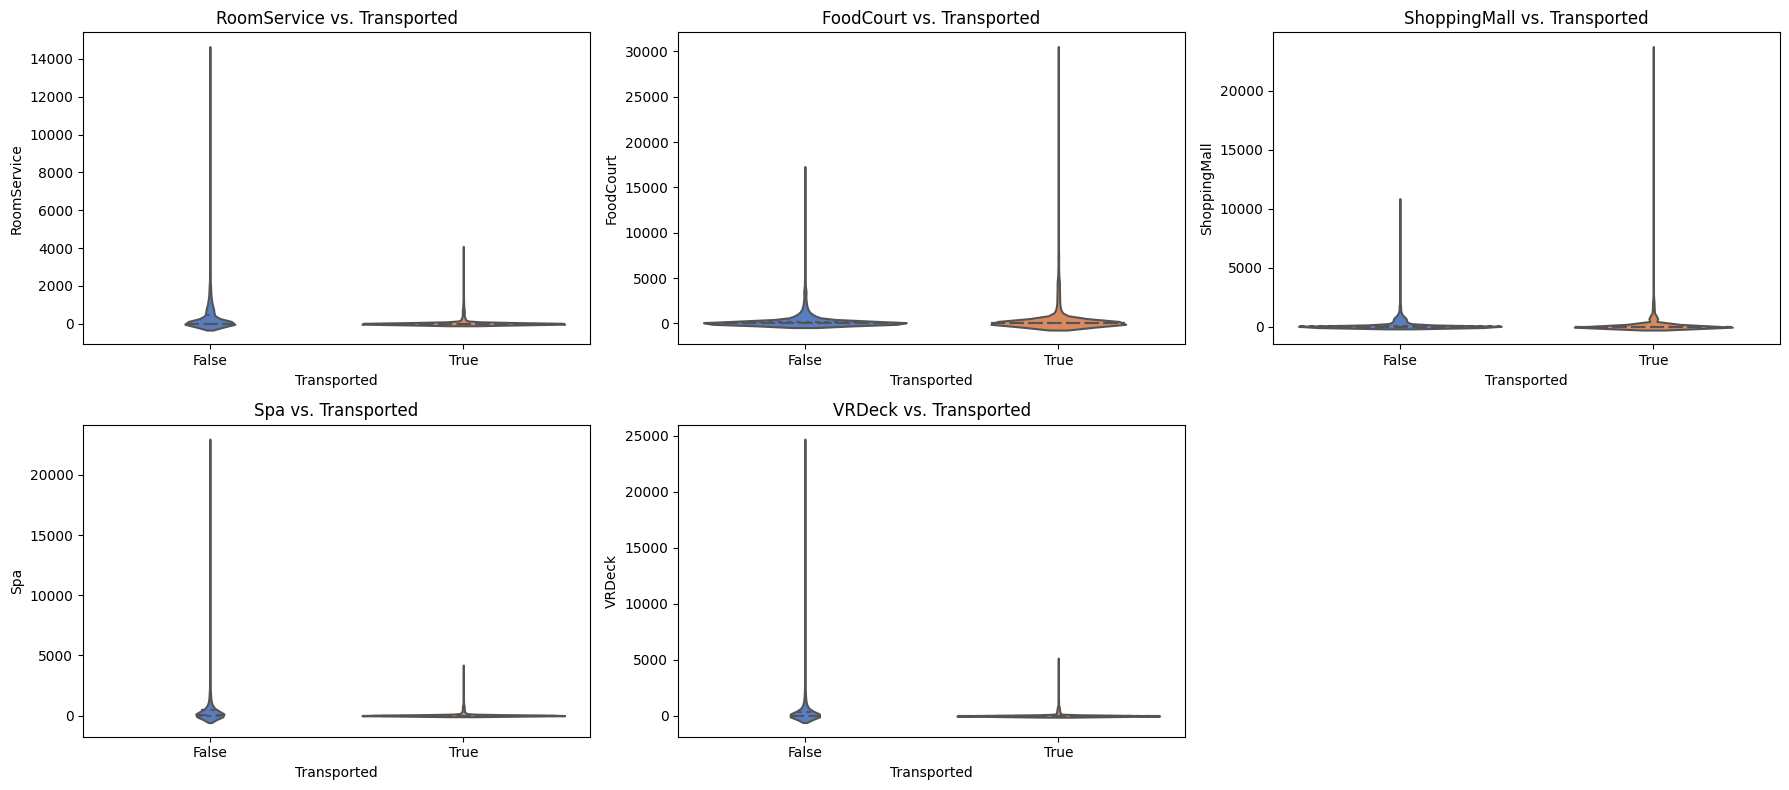

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

spending_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(18, 8))
for i, col in enumerate(spending_cols, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Transported', y=col, data=train_df, inner='quartile', palette='muted')
    plt.title(f'{col} vs. Transported')
    plt.xlabel('Transported')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


# feature engineering

## passengerId

In [13]:
# Split PassengerId into GroupID and IndividualID
train_df[['GroupID', 'IndividualID']] = train_df['PassengerId'].str.split('_', expand=True)

# Convert to numeric for better usage
train_df['GroupID'] = train_df['GroupID'].astype(int)
train_df['IndividualID'] = train_df['IndividualID'].astype(int)


In [14]:
# Split PassengerId into GroupID and IndividualID
test_df[['GroupID', 'IndividualID']] = test_df['PassengerId'].str.split('_', expand=True)

# Convert to numeric for better usage
test_df['GroupID'] = test_df['GroupID'].astype(int)
test_df['IndividualID'] = test_df['IndividualID'].astype(int)


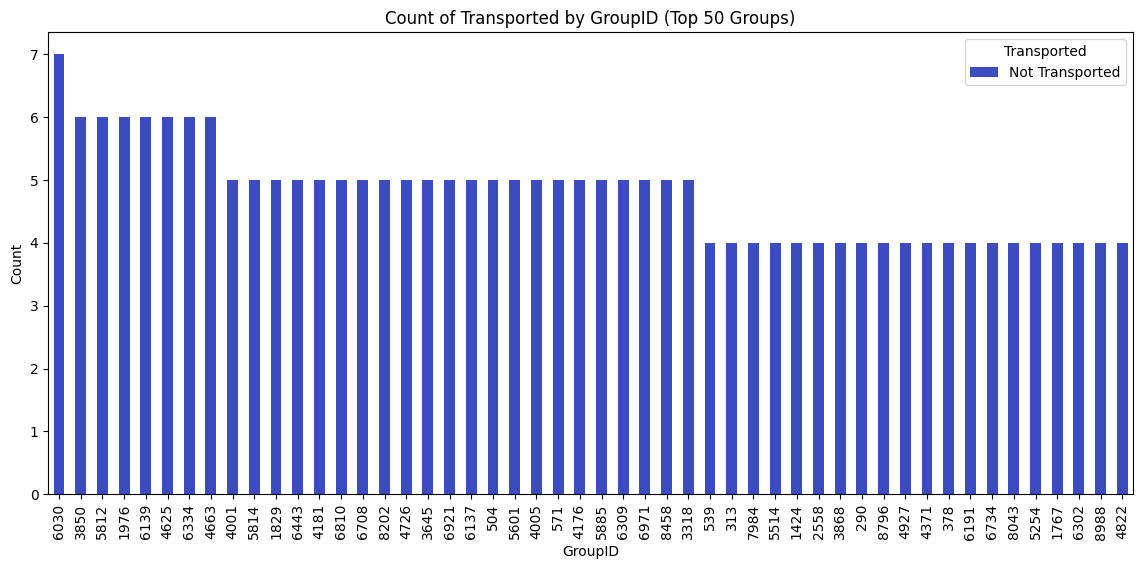

In [15]:
# Count the occurrences of 'Transported' (True/False) for each 'GroupID'
group_counts = train_df.groupby('GroupID')['Transported'].sum()

# Sort by the count of Transported values for better visualization
group_counts = group_counts.sort_values(ascending=False)

# Plot the bar chart for top 50 groups
plt.figure(figsize=(12, 6))
group_counts.head(50).plot(kind='bar', stacked=True, figsize=(14, 6), colormap='coolwarm')

plt.title('Count of Transported by GroupID (Top 50 Groups)')
plt.xlabel('GroupID')
plt.ylabel('Count')
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.xticks(rotation=90)
plt.show()


In [16]:
# Count the number of members in each GroupID
member_count = train_df.groupby('GroupID')['PassengerId'].transform('count')

# Add the new feature 'MemberCount' to the dataframe
train_df['MemberCount'] = member_count

# Display the updated dataframe with the new feature
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,GroupID,IndividualID,MemberCount
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,1


In [17]:
# Count the number of members in each GroupID for test_df
member_count_test = test_df.groupby('GroupID')['PassengerId'].transform('count')

# Add the new feature 'MemberCount' to the test_df
test_df['MemberCount'] = member_count_test

# Display the updated test dataframe with the new feature
test_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,GroupID,IndividualID,MemberCount
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,13,1,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,18,1,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,19,1,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,21,1,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,23,1,1


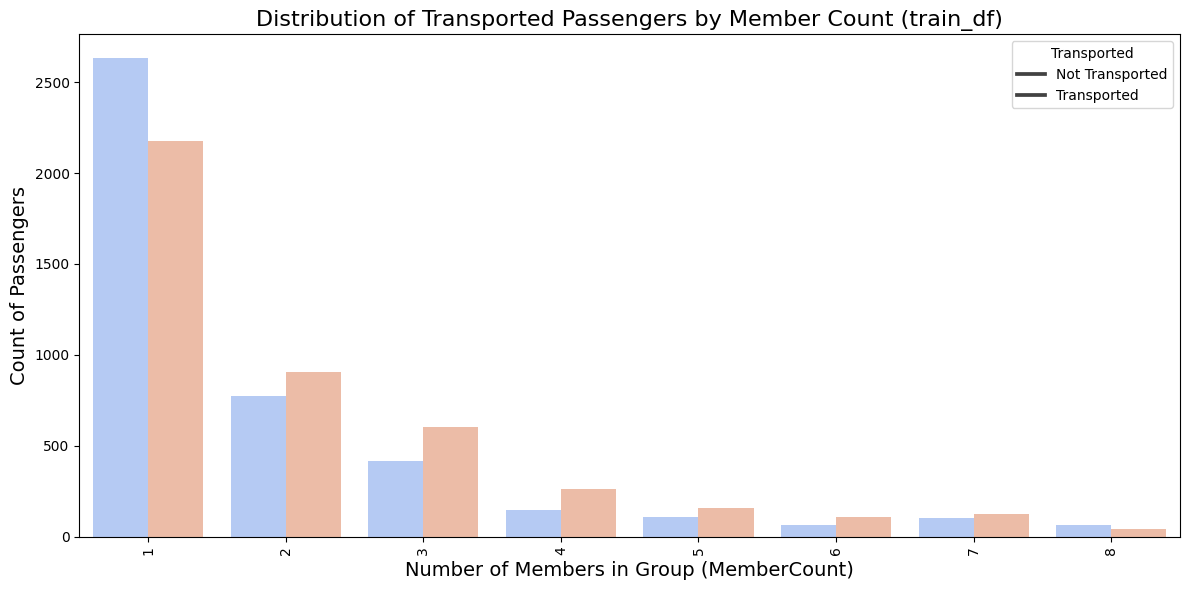

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of Transported for each MemberCount in train_df
member_transport_counts = train_df.groupby(['MemberCount', 'Transported']).size().reset_index(name='Count')

# Plotting the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='MemberCount', y='Count', hue='Transported', data=member_transport_counts, palette='coolwarm')

# Title and labels
plt.title('Distribution of Transported Passengers by Member Count (train_df)', fontsize=16)
plt.xlabel('Number of Members in Group (MemberCount)', fontsize=14)
plt.ylabel('Count of Passengers', fontsize=14)
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])

# Show plot
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


In [19]:
# Drop 'VIP' column from both train and test datasets
train_df = train_df.drop(columns=['VIP'])
test_df = test_df.drop(columns=['VIP'])

# Verify the changes
print(train_df.head())
print(test_df.head())


  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age  RoomService  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0          0.0   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0        109.0   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0         43.0   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0          0.0   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0        303.0   

   FoodCourt  ShoppingMall     Spa  VRDeck               Name  Transported  \
0        0.0           0.0     0.0     0.0    Maham Ofracculy        False   
1        9.0          25.0   549.0    44.0       Juanna Vines         True   
2     3576.0           0.0  6715.0    49.0      Altark Susent        False   
3     1283.0         371.0  3329.0   193.0       Solam Susent        False   
4       70.0         151.0   565.0     2.0  Willy Santantines         True   

   GroupID  IndividualID  MemberCount  
0        1             1    

In [20]:
# Create 'solo' feature for both train and test datasets
train_df['solo'] = train_df['MemberCount'].apply(lambda x: 1 if x == 1 else 0)
test_df['solo'] = test_df['MemberCount'].apply(lambda x: 1 if x == 1 else 0)

# Verify the changes
print(train_df[['PassengerId', 'MemberCount', 'solo']].head())
print(test_df[['PassengerId', 'MemberCount', 'solo']].head())


  PassengerId  MemberCount  solo
0     0001_01            1     1
1     0002_01            1     1
2     0003_01            2     0
3     0003_02            2     0
4     0004_01            1     1
  PassengerId  MemberCount  solo
0     0013_01            1     1
1     0018_01            1     1
2     0019_01            1     1
3     0021_01            1     1
4     0023_01            1     1


## Age

In [21]:
# Define bins and labels
bins = [0, 18, 25, float('inf')]
labels = ['1-18', '18-25', '25+']

# Create the 'age-range' feature for both train and test datasets
train_df['age-range'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
test_df['age-range'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

# Verify the changes
print(train_df[['PassengerId', 'Age', 'age-range']].head())
print(test_df[['PassengerId', 'Age', 'age-range']].head())


  PassengerId   Age age-range
0     0001_01  39.0       25+
1     0002_01  24.0     18-25
2     0003_01  58.0       25+
3     0003_02  33.0       25+
4     0004_01  16.0      1-18
  PassengerId   Age age-range
0     0013_01  27.0       25+
1     0018_01  19.0     18-25
2     0019_01  31.0       25+
3     0021_01  38.0       25+
4     0023_01  20.0     18-25


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


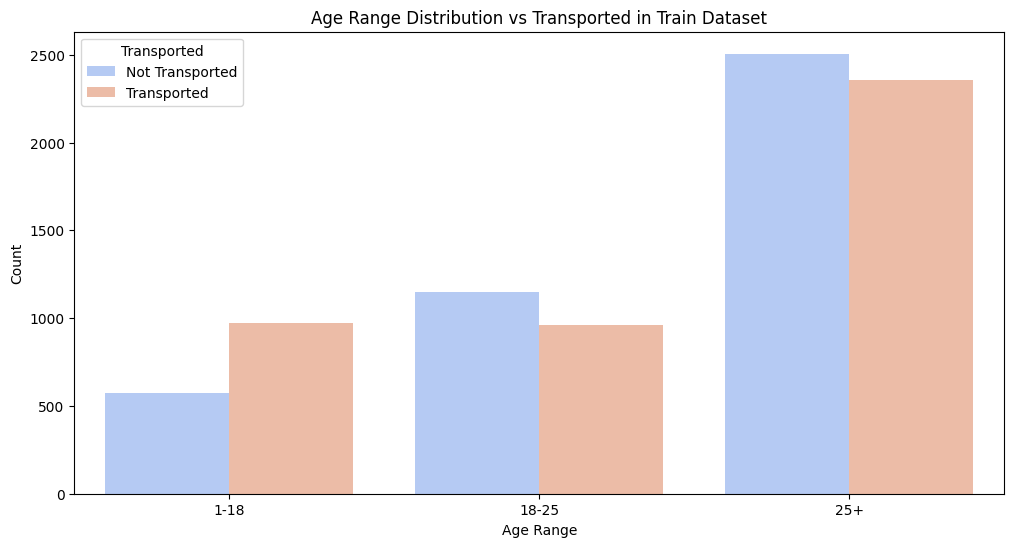

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='age-range', hue='Transported', palette='coolwarm')

plt.title('Age Range Distribution vs Transported in Train Dataset')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()


## expenditure

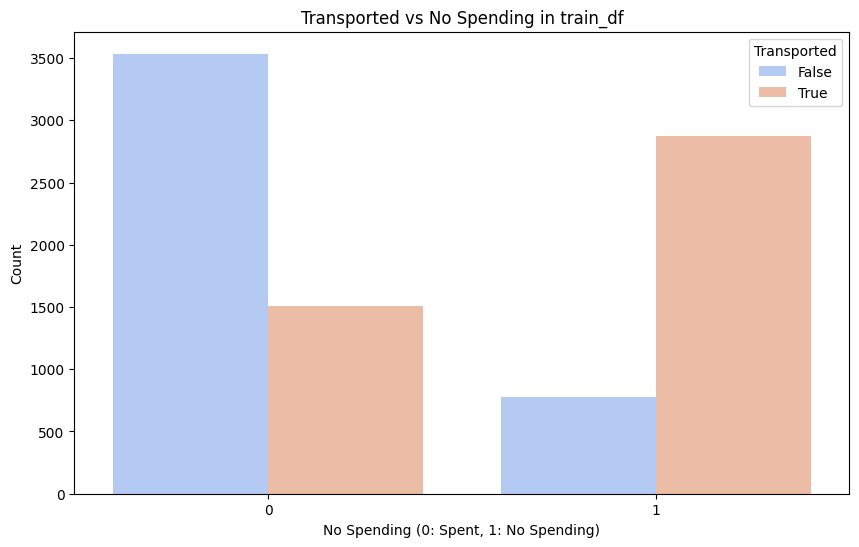

In [23]:
# New features - train_df
exp_feats = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train_df['Expenditure'] = train_df[exp_feats].sum(axis=1)
train_df['No_spending'] = (train_df['Expenditure'] == 0).astype(int)

# New features - test_df
test_df['Expenditure'] = test_df[exp_feats].sum(axis=1)
test_df['No_spending'] = (test_df['Expenditure'] == 0).astype(int)

# Countplot for No_spending vs Transported
plt.figure(figsize=(10, 6))
sns.countplot(x='No_spending', hue='Transported', data=train_df, palette='coolwarm')
plt.title('Transported vs No Spending in train_df')
plt.xlabel('No Spending (0: Spent, 1: No Spending)')
plt.ylabel('Count')
plt.legend(title='Transported')
plt.show()


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  GroupID       8693 non-null   int64   
 14  IndividualID  8693 non-null   int64   
 15  MemberCount   8693 non-null   int64   
 16  solo          8693 non-null   int64   
 17  age-range     8514 non-null   category
 18  Expendit

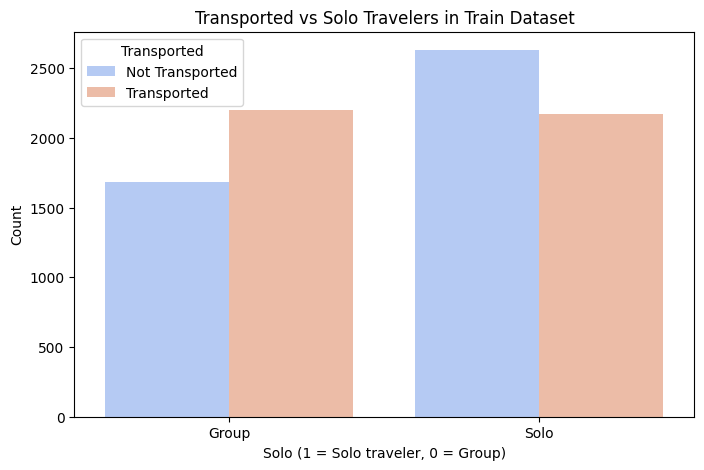

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(data=train_df, x='solo', hue='Transported', palette='coolwarm')

plt.title('Transported vs Solo Travelers in Train Dataset')
plt.xlabel('Solo (1 = Solo traveler, 0 = Group)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Group', 'Solo'])
plt.legend(title='Transported', labels=['Not Transported', 'Transported'])
plt.show()


## cabin

In [26]:
# Split the Cabin column into deck, num, and side
train_df[['Deck', 'CabinNum', 'Side']] = train_df['Cabin'].str.split('/', expand=True)

# Do the same for test_df
test_df[['Deck', 'CabinNum', 'Side']] = test_df['Cabin'].str.split('/', expand=True)

# Optionally: Convert CabinNum to numeric for further use
train_df['CabinNum'] = pd.to_numeric(train_df['CabinNum'], errors='coerce')
test_df['CabinNum'] = pd.to_numeric(test_df['CabinNum'], errors='coerce')


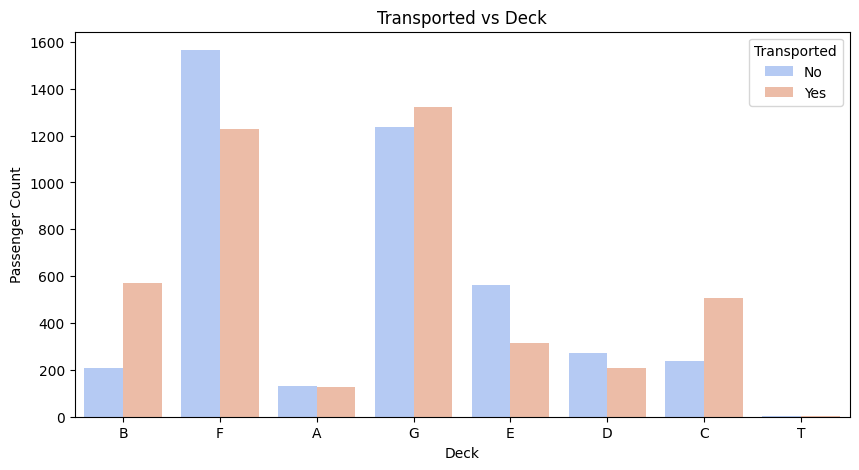

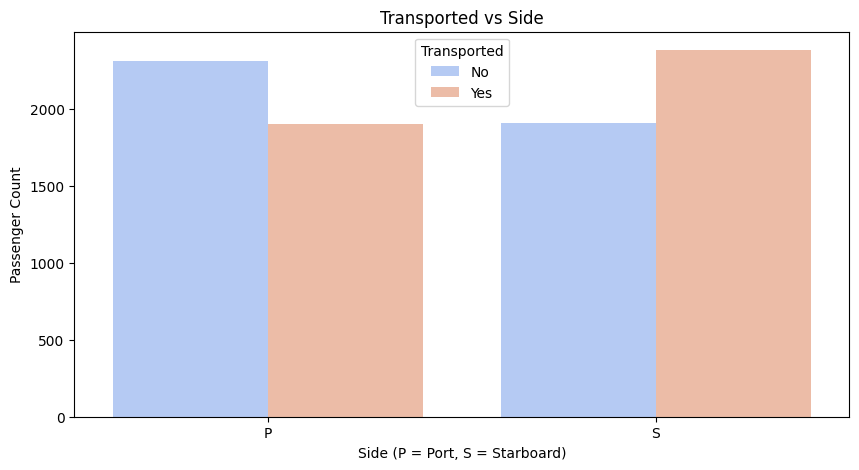

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


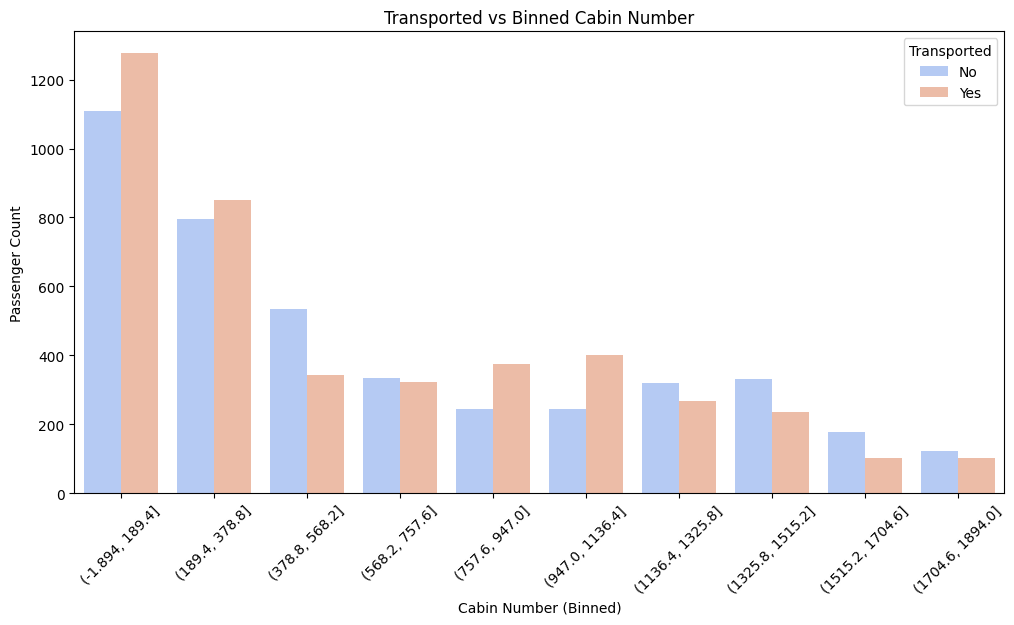

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Deck vs Transported
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='Deck', hue='Transported', palette='coolwarm')
plt.title('Transported vs Deck')
plt.xlabel('Deck')
plt.ylabel('Passenger Count')
plt.legend(title='Transported', labels=['No', 'Yes'])
plt.show()

# Plot Side vs Transported
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='Side', hue='Transported', palette='coolwarm')
plt.title('Transported vs Side')
plt.xlabel('Side (P = Port, S = Starboard)')
plt.ylabel('Passenger Count')
plt.legend(title='Transported', labels=['No', 'Yes'])
plt.show()

combined_cabin_nums = pd.concat([train_df['CabinNum'], test_df['CabinNum']], axis=0)

# Create bin edges based on combined data
bin_edges = pd.cut(combined_cabin_nums, bins=10, retbins=True)[1]

# Apply the same bins to both datasets
train_df['CabinNumBin'] = pd.cut(train_df['CabinNum'], bins=bin_edges)
test_df['CabinNumBin'] = pd.cut(test_df['CabinNum'], bins=bin_edges)
# Plot Binned CabinNum vs Transported
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='CabinNumBin', hue='Transported', palette='coolwarm')
plt.title('Transported vs Binned Cabin Number')
plt.xlabel('Cabin Number (Binned)')
plt.ylabel('Passenger Count')
plt.xticks(rotation=45)
plt.legend(title='Transported', labels=['No', 'Yes'])
plt.show()


## name

In [28]:
# Extract surname from 'Name' in both train_df and test_df
train_df['Surname'] = train_df['Name'].dropna().apply(lambda x: x.split()[-1])
test_df['Surname'] = test_df['Name'].dropna().apply(lambda x: x.split()[-1])

# Map the surname to family size
surname_counts = train_df['Surname'].value_counts()
train_df['FamilySize'] = train_df['Surname'].map(surname_counts)

# Handle NaNs or missing names (if any)
train_df['FamilySize'] = train_df['FamilySize'].fillna(1).astype(int)

# Apply same logic to test_df using train surname_counts
test_df['FamilySize'] = test_df['Surname'].map(surname_counts)
test_df['FamilySize'] = test_df['FamilySize'].fillna(1).astype(int)


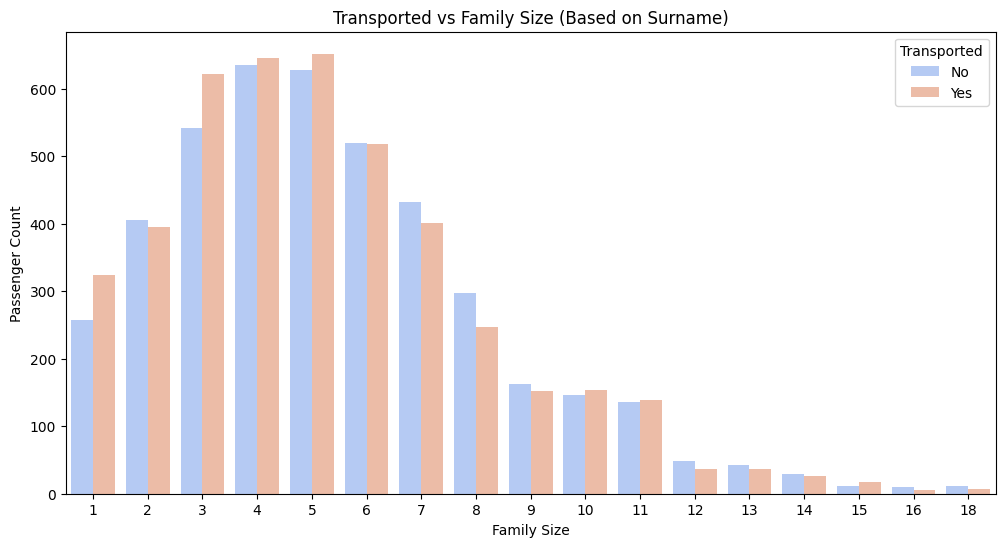

In [29]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='FamilySize', hue='Transported', palette='coolwarm')
plt.title('Transported vs Family Size (Based on Surname)')
plt.xlabel('Family Size')
plt.ylabel('Passenger Count')
plt.legend(title='Transported', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()


In [30]:
# Compare the column names of train_df and test_df
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)

# Columns in train_df but not in test_df
missing_in_test = train_columns - test_columns

# Columns in test_df but not in train_df
missing_in_train = test_columns - train_columns

# Display missing columns
print(f"Columns in train_df but not in test_df: {missing_in_test}")
print(f"Columns in test_df but not in train_df: {missing_in_train}")


Columns in train_df but not in test_df: {'Transported'}
Columns in test_df but not in train_df: set()


In [31]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  GroupID       8693 non-null   int64   
 14  IndividualID  8693 non-null   int64   
 15  MemberCount   8693 non-null   int64   
 16  solo          8693 non-null   int64   
 17  age-range     8514 non-null   category
 18  Expendit

In [32]:
# 1. Save the target with its index (so you can merge later)
train_target = train_df[['PassengerId', 'Transported']].copy()

# 2. Drop the target column from the training data to create feature set
train_features = train_df.drop(columns=['Transported'])

# 3. Concatenate train_features and test_df (keeping original indices intact)
data = pd.concat([train_features, test_df], ignore_index=False)

# (Optional) Check everything
print("train_target shape:", train_target.shape)
print("train_features shape:", train_features.shape)
print("test_df shape:", test_df.shape)
print("full_data shape:",data.shape)


train_target shape: (8693, 2)
train_features shape: (8693, 25)
test_df shape: (4277, 25)
full_data shape: (12970, 25)


# missing data

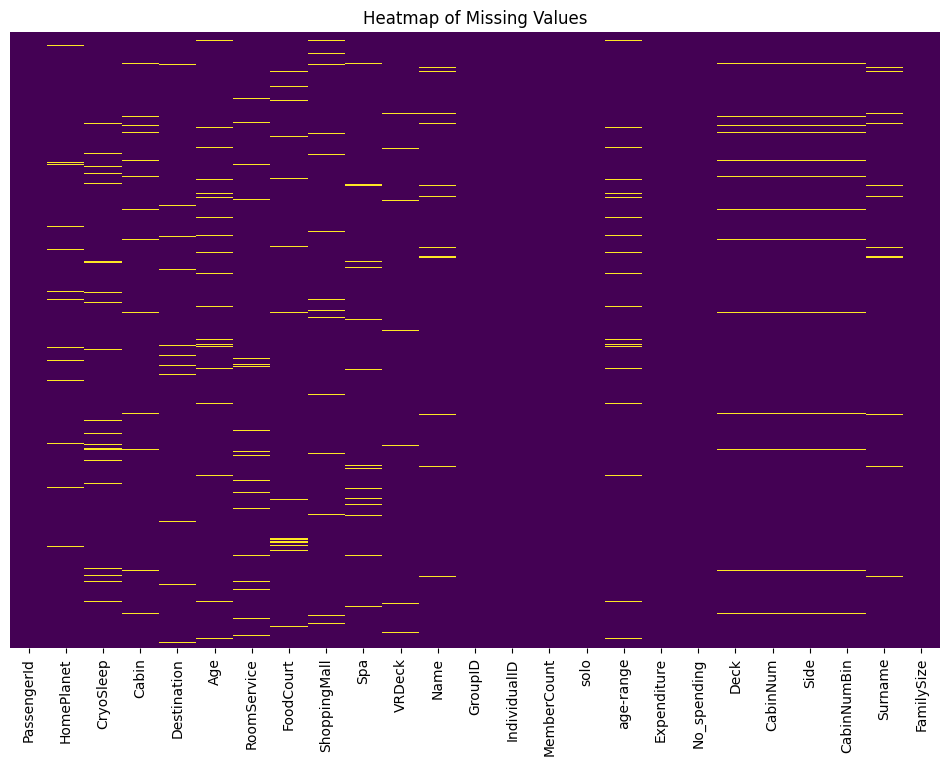

In [33]:
# Plotting the heatmap for missing values
plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values')
plt.show()

In [34]:
# Calculate the percentage of missing values per column for each row (passenger)
missing_percentage_per_passenger = data.isnull().mean(axis=1) * 100

# Convert it to a DataFrame for better visualization
missing_percentage_per_passenger_df = pd.DataFrame({'PassengerId': data['PassengerId'], 'Missing Percentage': missing_percentage_per_passenger})

# Display the DataFrame with missing percentages for each passenger
print(missing_percentage_per_passenger_df)


     PassengerId  Missing Percentage
0        0001_01                 0.0
1        0002_01                 0.0
2        0003_01                 0.0
3        0003_02                 0.0
4        0004_01                 0.0
...          ...                 ...
4272     9266_02                 0.0
4273     9269_01                20.0
4274     9271_01                 8.0
4275     9273_01                12.0
4276     9277_01                 0.0

[12970 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


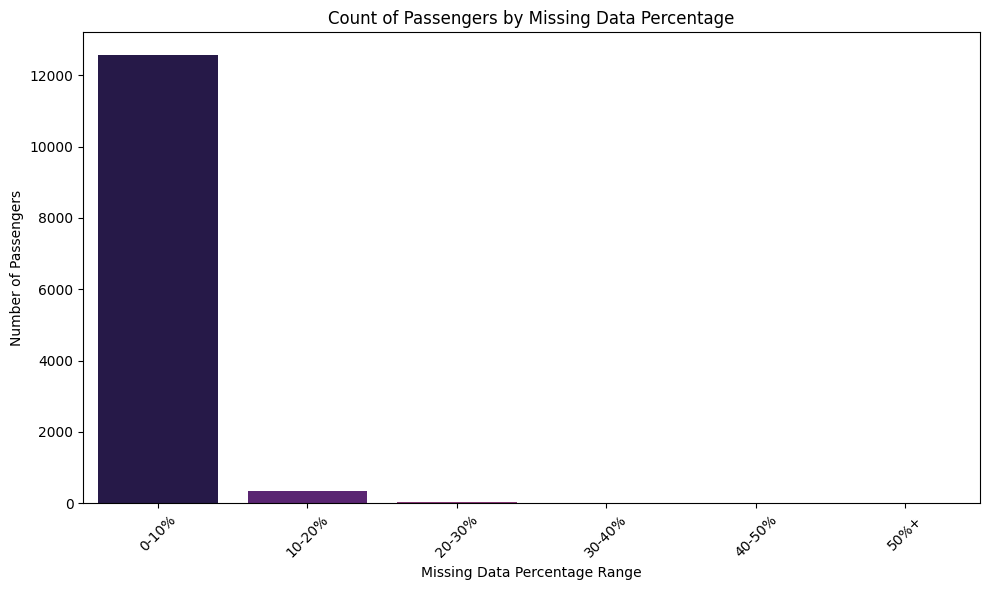

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the percentage of missing values per passenger
missing_percentage_per_passenger = data.isnull().mean(axis=1) * 100

# Bin the missing percentages into ranges
bins = [0, 10, 20, 30, 40, 50, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50%+']
data['MissingPctBin'] = pd.cut(missing_percentage_per_passenger, bins=bins, labels=labels, include_lowest=True)

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='MissingPctBin', data=data, palette='magma')

plt.title('Count of Passengers by Missing Data Percentage')
plt.xlabel('Missing Data Percentage Range')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [36]:
data = data  # or replace with `data` if needed

# Columns with missing values
na_cols = data.columns[data.isna().any()].tolist()

# Missing values summary
mv = pd.DataFrame(data[na_cols].isna().sum(), columns=['Number_missing'])
mv['Percentage_missing'] = np.round(100 * mv['Number_missing'] / len(data), 2)

# Optional: sort by most missing
mv = mv.sort_values(by='Percentage_missing', ascending=False)

In [37]:
mv

,Number_missing,Percentage_missing
CryoSleep,310,2.39
ShoppingMall,306,2.36
Cabin,299,2.31
CabinNumBin,299,2.31
Side,299,2.31
CabinNum,299,2.31
Deck,299,2.31
Surname,294,2.27
Name,294,2.27
FoodCourt,289,2.23


## home planet 

In [38]:
# Joint distribution of GroupID and HomePlanet
GHP_gb = data.groupby(['GroupID', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)

# Display the first few rows
GHP_gb


HomePlanet,Earth,Europa,Mars
GroupID,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
...,...,...,...
9276,0.0,1.0,0.0
9277,1.0,0.0,0.0
9278,1.0,0.0,0.0


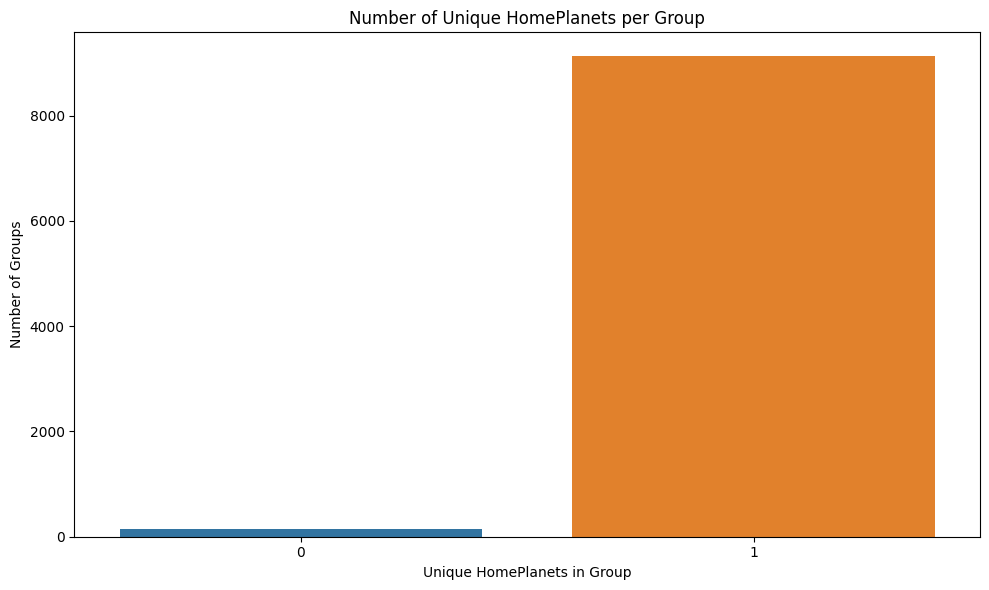

In [39]:
unique_home_planets_per_group = (data.groupby('GroupID')['HomePlanet']
                                  .nunique())

# Plot the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=unique_home_planets_per_group)
plt.title('Number of Unique HomePlanets per Group')
plt.xlabel('Unique HomePlanets in Group')
plt.ylabel('Number of Groups')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [40]:
# Fill HomePlanet missing values with the most frequent HomePlanet in each GroupID
homeplanet_mode_by_group = data.groupby('GroupID')['HomePlanet'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Apply the fill for missing values in train_df
data['HomePlanet'] = data.apply(
    lambda row: homeplanet_mode_by_group[row['GroupID']] if pd.isna(row['HomePlanet']) else row['HomePlanet'],
    axis=1
)

In [41]:
data['HomePlanet'].isna().sum()

157

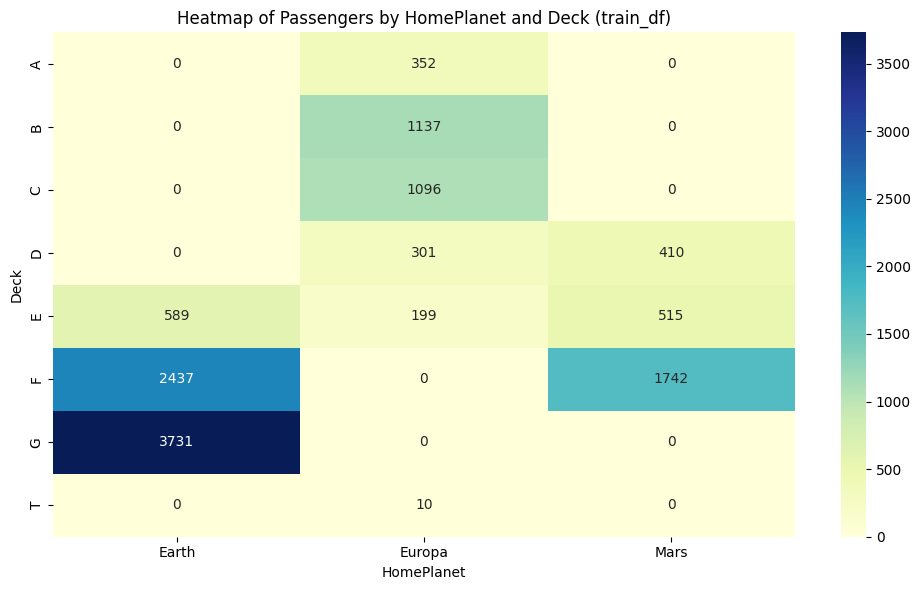

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the pivot table (Deck as rows, HomePlanet as columns)
heatmap_data = data.pivot_table(index='Deck', columns='HomePlanet', 
                                    values='PassengerId', aggfunc='count', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')

plt.title('Heatmap of Passengers by HomePlanet and Deck (train_df)')
plt.xlabel('HomePlanet')
plt.ylabel('Deck')
plt.tight_layout()
plt.show()


In [43]:
# Define mapping for decks
deck_to_homeplanet = {
    'A': 'Europa',
    'B': 'Europa',
    'C': 'Europa',
    'T': 'Europa',
    'G': 'Earth'
    # D, E, F → not filled
}

# Fill missing HomePlanet values based on Deck
data['HomePlanet'] = data.apply(
    lambda row: deck_to_homeplanet[row['Deck']] if pd.isna(row['HomePlanet']) and row['Deck'] in deck_to_homeplanet else row['HomePlanet'],
    axis=1
)

In [44]:
data['HomePlanet'].isna().sum()

94

In [45]:
# Group by Surname and check the number of unique HomePlanet values
unique_homeplanet_per_surname = data.groupby('Surname')['HomePlanet'].nunique()

# Find surnames that have more than one unique HomePlanet
multi_homeplanet_surnames = unique_homeplanet_per_surname[unique_homeplanet_per_surname > 1]

# Check how many surnames have multiple HomePlanet values
print(f"Surnames with multiple HomePlanet values:\n{multi_homeplanet_surnames}")

# You can also get a count of these surnames
num_multi_homeplanet_surnames = len(multi_homeplanet_surnames)
print(f"Number of surnames with multiple HomePlanet values: {num_multi_homeplanet_surnames}")


Surnames with multiple HomePlanet values:
Series([], Name: HomePlanet, dtype: int64)
Number of surnames with multiple HomePlanet values: 0


In [46]:
# Create a mapping from Surname to HomePlanet (only for surnames with a single unique HomePlanet)
surname_homeplanet_mapping = data.groupby('Surname')['HomePlanet'].apply(lambda x: x.dropna().mode().iloc[0] if not x.dropna().mode().empty else None).to_dict()

# Fill missing HomePlanet values based on Surname
data['HomePlanet'] = data.apply(lambda row: surname_homeplanet_mapping.get(row['Surname'], row['HomePlanet']), axis=1)

# Check if there are any missing HomePlanet values left
missing_train_homeplanet = data['HomePlanet'].isna().sum()

print(f"Missing HomePlanet values in train dataset after filling: {missing_train_homeplanet}")


Missing HomePlanet values in train dataset after filling: 10


In [47]:
# Display rows where 'HomePlanet' is missing in train_df
missing_homeplanet_train = data[data['HomePlanet'].isna()]

# Show the DataFrame
missing_homeplanet_train


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,...,age-range,Expenditure,No_spending,Deck,CabinNum,Side,CabinNumBin,Surname,FamilySize,MissingPctBin
2274,2443_01,NaN,False,D/72/P,TRAPPIST-1e,31.0,1458.0,421.0,76.0,0.0,...,25+,1955.0,0,D,72.0,P,"(-1.894, 189.4]",NaN,1,10-20%
2631,2817_01,None,False,F/584/P,TRAPPIST-1e,25.0,237.0,0.0,910.0,0.0,...,25+,1159.0,0,F,584.0,P,"(568.2, 757.6]",Sutty,1,0-10%
3091,3331_01,NaN,False,F/631/S,TRAPPIST-1e,40.0,666.0,4.0,83.0,0.0,...,25+,803.0,0,F,631.0,S,"(568.2, 757.6]",NaN,1,10-20%
4548,4840_01,NaN,True,F/915/S,TRAPPIST-1e,36.0,0.0,0.0,NaN,0.0,...,25+,0.0,1,F,915.0,S,"(757.6, 947.0]",NaN,1,10-20%
5762,6108_01,NaN,False,F/1166/S,TRAPPIST-1e,13.0,206.0,28.0,0.0,1.0,...,1-18,864.0,0,F,1166.0,S,"(1136.4, 1325.8]",NaN,1,10-20%
276,0616_01,None,False,E/40/S,TRAPPIST-1e,31.0,0.0,428.0,NaN,1154.0,...,25+,2607.0,0,E,40.0,S,"(-1.894, 189.4]",Spriney,1,0-10%
1890,4052_01,None,False,D/136/P,TRAPPIST-1e,26.0,6.0,5903.0,0.0,240.0,...,25+,6221.0,0,D,136.0,P,"(-1.894, 189.4]",Coneveseng,1,0-10%
3220,7065_01,None,True,E/471/S,TRAPPIST-1e,28.0,0.0,0.0,0.0,0.0,...,25+,0.0,1,E,471.0,S,"(378.8, 568.2]",Maltorted,1,0-10%
3858,8435_01,NaN,NaN,F/1730/P,TRAPPIST-1e,19.0,162.0,11.0,0.0,0.0,...,18-25,1389.0,0,F,1730.0,P,"(1704.6, 1894.0]",NaN,1,10-20%
4032,8775_01,None,True,D/275/P,TRAPPIST-1e,40.0,0.0,0.0,0.0,0.0,...,25+,0.0,1,D,275.0,P,"(189.4, 378.8]",Maltorted,1,0-10%


In [48]:
# Check rows where 'HomePlanet' is not missing and display their 'Destination'
non_missing_homeplanet_train = data[data['HomePlanet'].notna()]
non_missing_homeplanet_train[['PassengerId', 'Destination', 'HomePlanet']]

# Check the unique destinations for rows with non-missing 'HomePlanet'
non_missing_homeplanet_train['Destination'].value_counts()


Destination
TRAPPIST-1e      8861
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

In [49]:
# Filter the dataset to get rows where Destination is 'TRAPPIST-1e'
trappist_passengers = data[data['Destination'] == 'TRAPPIST-1e']

# Display the HomePlanet for these passengers
homeplanet_trappist = trappist_passengers[['PassengerId', 'HomePlanet']]
print(homeplanet_trappist)

# Check the count of each unique HomePlanet for passengers with Destination 'TRAPPIST-1e'
homeplanet_trappist_count = homeplanet_trappist['HomePlanet'].value_counts()

# Display the result
print(homeplanet_trappist_count)


     PassengerId HomePlanet
0        0001_01     Europa
1        0002_01      Earth
2        0003_01     Europa
3        0003_02     Europa
4        0004_01      Earth
...          ...        ...
4269     9263_01      Earth
4270     9265_01       Mars
4271     9266_01      Earth
4272     9266_02      Earth
4273     9269_01      Earth

[8871 rows x 2 columns]
HomePlanet
Earth     4778
Mars      2314
Europa    1769
Name: count, dtype: int64


In [50]:
# Fill missing values in HomePlanet with 'Earth'
data['HomePlanet'].fillna('Earth', inplace=True)

# Verify the changes
print(data[['PassengerId', 'HomePlanet']].head())


  PassengerId HomePlanet
0     0001_01     Europa
1     0002_01      Earth
2     0003_01     Europa
3     0003_02     Europa
4     0004_01      Earth


<ipython-input-50-92310ebd9b18>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['HomePlanet'].fillna('Earth', inplace=True)


## destination

In [51]:
# Impute missing values in 'Destination' with the mode
data['Destination'].fillna(data['Destination'].mode()[0], inplace=True)

# Verify the changes
print(data[['PassengerId', 'Destination']].head())


  PassengerId  Destination
0     0001_01  TRAPPIST-1e
1     0002_01  TRAPPIST-1e
2     0003_01  TRAPPIST-1e
3     0003_02  TRAPPIST-1e
4     0004_01  TRAPPIST-1e


<ipython-input-51-e60f36c99850>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Destination'].fillna(data['Destination'].mode()[0], inplace=True)


In [52]:
# Check if there are any missing values in 'Destination' column
na_destination = data['Destination'].isna().sum()

# Print the result
print(f"Number of missing values in 'Destination' column: {na_destination}")


Number of missing values in 'Destination' column: 0


## surname and group

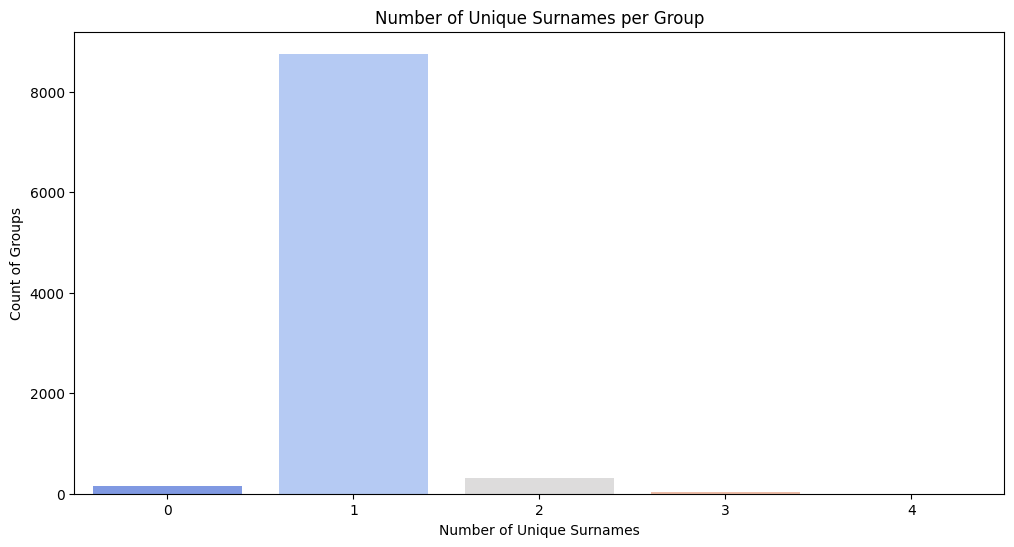

In [53]:
# Count the number of unique surnames for each GroupID
unique_surnames_per_group = data.groupby('GroupID')['Surname'].nunique()

# Plot the count of unique surnames per group
plt.figure(figsize=(12, 6))
sns.countplot(x=unique_surnames_per_group, palette='coolwarm')
plt.title('Number of Unique Surnames per Group')
plt.xlabel('Number of Unique Surnames')
plt.ylabel('Count of Groups')
plt.show()


In [54]:
# Fill missing Surname values with the mode of the respective GroupID
def get_mode(x):
    mode_val = x.mode()
    return mode_val[0] if not mode_val.empty else None

# Apply the mode function to each GroupID
group_mode_surname = data.groupby('GroupID')['Surname'].apply(get_mode)

# Create a mapping from GroupID to mode surname
surname_mapping = group_mode_surname.to_dict()

# Fill missing values in Surname using the group mode mapping
data['Surname'] = data.apply(
    lambda row: surname_mapping.get(row['GroupID'], row['Surname']) if pd.isna(row['Surname']) else row['Surname'], axis=1
)

# Check for remaining NA values in the Surname column
missing_surnames = data['Surname'].isna().sum()
print(f"Number of missing Surnames after filling: {missing_surnames}")


Number of missing Surnames after filling: 155


In [55]:
# Replace remaining missing values in Surname with 'unknown'
data['Surname'].fillna('unknown', inplace=True)

# Check if there are any missing values left
missing_surnames = data['Surname'].isna().sum()
print(f"Number of missing Surnames after replacing with 'unknown': {missing_surnames}")


Number of missing Surnames after replacing with 'unknown': 0


<ipython-input-55-537f2d4c9d69>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Surname'].fillna('unknown', inplace=True)


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    12970 non-null  object  
 1   HomePlanet     12970 non-null  object  
 2   CryoSleep      12660 non-null  object  
 3   Cabin          12671 non-null  object  
 4   Destination    12970 non-null  object  
 5   Age            12700 non-null  float64 
 6   RoomService    12707 non-null  float64 
 7   FoodCourt      12681 non-null  float64 
 8   ShoppingMall   12664 non-null  float64 
 9   Spa            12686 non-null  float64 
 10  VRDeck         12702 non-null  float64 
 11  Name           12676 non-null  object  
 12  GroupID        12970 non-null  int64   
 13  IndividualID   12970 non-null  int64   
 14  MemberCount    12970 non-null  int64   
 15  solo           12970 non-null  int64   
 16  age-range      12700 non-null  category
 17  Expenditure    12970 non-null  float6

## cabin side 

In [57]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   8693 non-null   object  
 1   HomePlanet    8492 non-null   object  
 2   CryoSleep     8476 non-null   object  
 3   Cabin         8494 non-null   object  
 4   Destination   8511 non-null   object  
 5   Age           8514 non-null   float64 
 6   RoomService   8512 non-null   float64 
 7   FoodCourt     8510 non-null   float64 
 8   ShoppingMall  8485 non-null   float64 
 9   Spa           8510 non-null   float64 
 10  VRDeck        8505 non-null   float64 
 11  Name          8493 non-null   object  
 12  Transported   8693 non-null   bool    
 13  GroupID       8693 non-null   int64   
 14  IndividualID  8693 non-null   int64   
 15  MemberCount   8693 non-null   int64   
 16  solo          8693 non-null   int64   
 17  age-range     8514 non-null   category
 18  Expendit

<ipython-input-58-b1833805b912>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_distribution = grouped_passengers.groupby(['Deck', 'Side', 'CabinNumBin']).size().reset_index(name='Count')


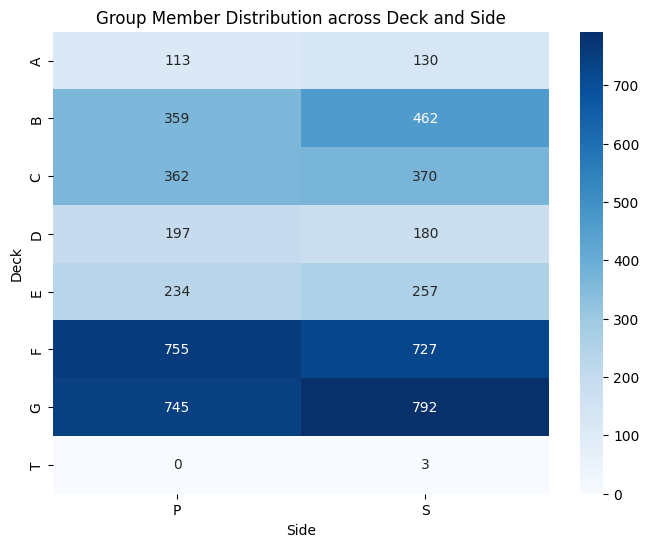

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter for group members (IndividualID > 1)
grouped_passengers = data[data['MemberCount'] > 1]

# Group by Deck, Side, and CabinNumBin and count number of group members in each
group_distribution = grouped_passengers.groupby(['Deck', 'Side', 'CabinNumBin']).size().reset_index(name='Count')

# Plot the distribution as a countplot-like heatmap
pivot_table = group_distribution.pivot_table(index='Deck', columns='Side', values='Count', aggfunc='sum', fill_value=0)

# Heatmap to visualize how group members are dispersed through Deck and Side
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Blues')
plt.title('Group Member Distribution across Deck and Side')
plt.ylabel('Deck')
plt.xlabel('Side')
plt.show()


<ipython-input-59-de469e173321>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  number_group = grouped_data.groupby(['GroupID', 'CabinNumBin'])['CabinNumBin'].size().unstack().fillna(0)


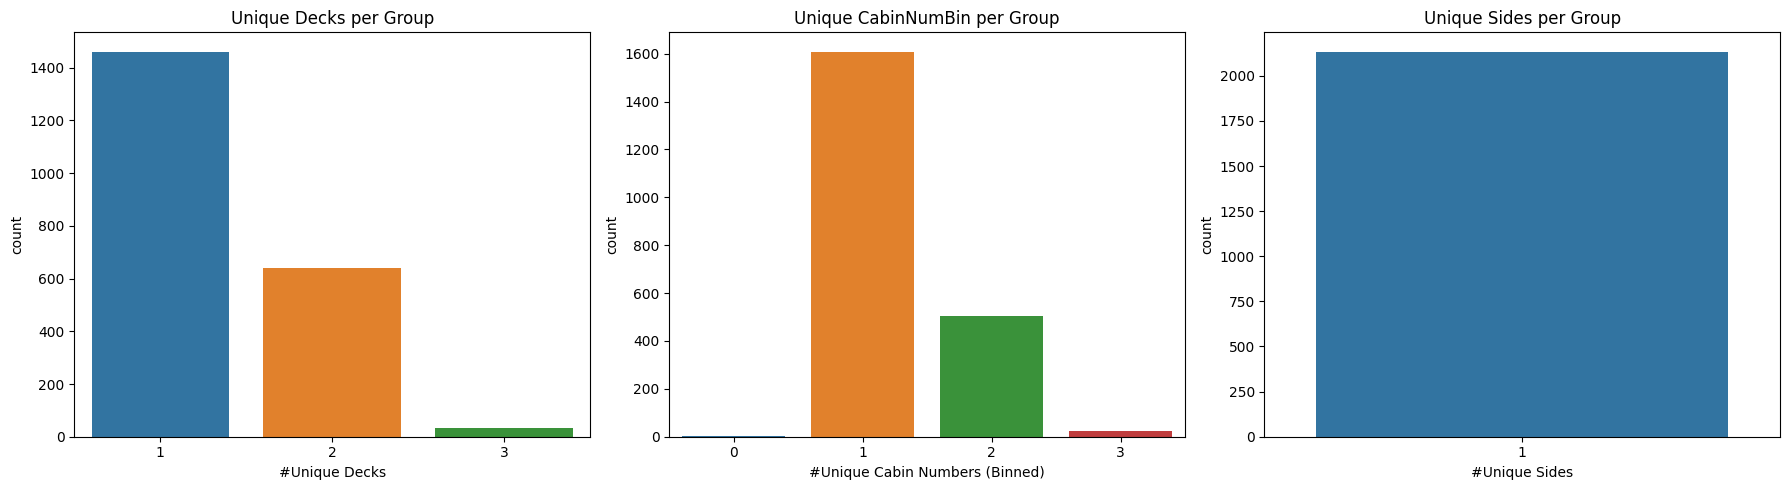

In [59]:
# Filter groups with more than one member
grouped_data = data[data['MemberCount'] > 1]

# Create groupby tables
deck_group = grouped_data.groupby(['GroupID', 'Deck'])['Deck'].size().unstack().fillna(0)
number_group = grouped_data.groupby(['GroupID', 'CabinNumBin'])['CabinNumBin'].size().unstack().fillna(0)
side_group = grouped_data.groupby(['GroupID', 'Side'])['Side'].size().unstack().fillna(0)

# Plot countplots
fig = plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x=(deck_group > 0).sum(axis=1))
plt.title('Unique Decks per Group')
plt.xlabel('#Unique Decks')

plt.subplot(1, 3, 2)
sns.countplot(x=(number_group > 0).sum(axis=1))
plt.title('Unique CabinNumBin per Group')
plt.xlabel('#Unique Cabin Numbers (Binned)')

plt.subplot(1, 3, 3)
sns.countplot(x=(side_group > 0).sum(axis=1))
plt.title('Unique Sides per Group')
plt.xlabel('#Unique Sides')

plt.tight_layout()
plt.show()

In [60]:
# Get the most frequent (mode) Side per GroupID
group_side_mode = data.groupby('GroupID')['Side'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Fill missing Side values using the group mode
data['Side'] = data.apply(
    lambda row: group_side_mode[row['GroupID']] if pd.isna(row['Side']) and row['GroupID'] in group_side_mode else row['Side'],
    axis=1
)


In [61]:
# Filter groups with more than one member
multi_member = data[data['MemberCount'] > 1]

# Group by GroupID and Surname, and check how many unique 'Side' values are present
same_side_check = multi_member.groupby(['GroupID', 'Surname'])['Side'].nunique()

# Groups where all members are on the same side will have nunique == 1
same_side_groups = same_side_check == 1

# Calculate percentage
percentage_same_side = same_side_groups.mean() * 100

print(f"{percentage_same_side:.2f}% of groups with the same surname and more than one member are all on the same Side.")


99.96% of groups with the same surname and more than one member are all on the same Side.


In [62]:
# Count of consistent groups (all on the same side)
num_same_side = same_side_groups.sum()

# Count of inconsistent groups (not all on the same side)
num_not_same_side = (~same_side_groups).sum()

# Difference
diff = num_not_same_side - num_same_side

print(f"Difference (not same side - same side): {diff}")


Difference (not same side - same side): -2544


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


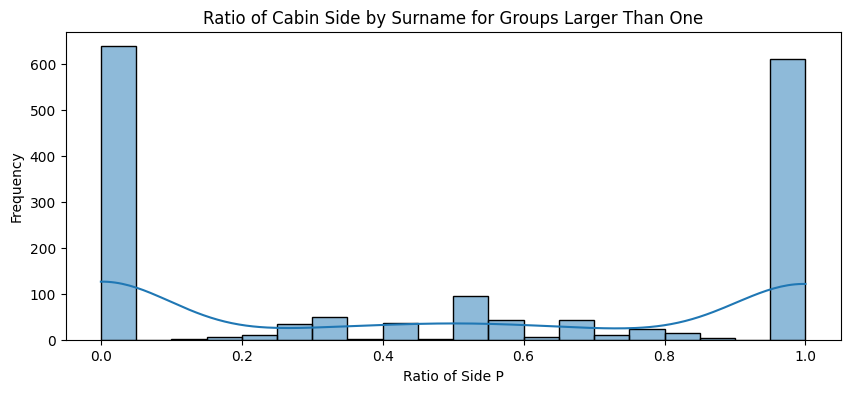

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure that group size is calculated based on GroupID
data['Group_size'] = data.groupby('GroupID')['Surname'].transform('count')

# Filter the data to include only groups with more than 1 member
grouped_data = data[data['Group_size'] > 1]

# Joint distribution of Surname and Cabin side (Side)
SCS_gb = grouped_data.groupby(['Surname', 'Side'])['Side'].size().unstack().fillna(0)

# Calculate the ratio of 'P' vs 'S' side
SCS_gb['Ratio'] = SCS_gb['P'] / (SCS_gb['P'] + SCS_gb['S'])

# Plot the histogram of the ratio of cabin sides by surname
plt.figure(figsize=(10, 4))
sns.histplot(SCS_gb['Ratio'], kde=True, binwidth=0.05)
plt.title('Ratio of Cabin Side by Surname for Groups Larger Than One')
plt.xlabel('Ratio of Side P')
plt.ylabel('Frequency')
plt.show()


In [64]:
# Identify surnames where all group members have the same side (ignoring missing values)
same_side_surnames = grouped_data.groupby('Surname')['Side'].apply(lambda x: x.nunique() == 1 and x.notna().all())

# Filter the surnames that have the same side
surnames_to_fill = same_side_surnames[same_side_surnames].index

# Fill missing values for these surnames with the known side
for surname in surnames_to_fill:
    common_side = grouped_data[grouped_data['Surname'] == surname]['Side'].dropna().iloc[0]
    data.loc[(data['Surname'] == surname) & (data['Side'].isna()), 'Side'] = common_side

# Check the number of missing values after filling
missing_after_fill = data['Side'].isna().sum()
print(f"Number of missing values in 'Side' after filling: {missing_after_fill}")


Number of missing values in 'Side' after filling: 92


In [65]:
# Fill remaining missing values in 'Side' with 'z'
data['Side'] = data['Side'].fillna('z')

# Check the number of missing values after filling
missing_after_fill = data['Side'].isna().sum()
print(f"Number of missing values in 'Side' after filling: {missing_after_fill}")


Number of missing values in 'Side' after filling: 0


## cabin deck

In [66]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Cabin            299
Destination        0
Age              270
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
GroupID            0
IndividualID       0
MemberCount        0
solo               0
age-range        270
Expenditure        0
No_spending        0
Deck             299
CabinNum         299
Side               0
CabinNumBin      299
Surname            0
FamilySize         0
MissingPctBin      0
Group_size         0
dtype: int64

In [67]:
# Step 1: Identify missing Deck values
deck_na_mask = data['Deck'].isna()

# Step 2: Create a mapping of GroupID -> Deck only if all members of that group are from the same Deck
# First, get all groups with members only from one deck
grouped_deck_counts = data[~data['Deck'].isna()]
grouped_deck_pivot = grouped_deck_counts.groupby(['GroupID', 'Deck'])['PassengerId'].count().unstack().fillna(0)

# Find groups with Deck assigned to only one unique deck
valid_group_decks = grouped_deck_pivot[(grouped_deck_pivot > 0).sum(axis=1) == 1]
# Get the actual deck value per group
group_deck_map = valid_group_decks.idxmax(axis=1)

# Step 3: Fill missing Decks using this mapping
data.loc[deck_na_mask, 'Deck'] = data.loc[deck_na_mask, 'GroupID'].map(group_deck_map)

# Step 4: Check how many Deck values are still missing
remaining_na_deck = data['Deck'].isna().sum()
print(f"Remaining missing Deck values: {remaining_na_deck}")

# Step 5: Display rows with missing Deck in DataFrame format
missing_deck_df = data[data['Deck'].isna()]
display(missing_deck_df)


Remaining missing Deck values: 181


/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,...,Expenditure,No_spending,Deck,CabinNum,Side,CabinNumBin,Surname,FamilySize,MissingPctBin,Group_size
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,32.0,0.0,876.0,0.0,...,908.0,0,NaN,NaN,S,NaN,Pooles,7,10-20%,1
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,NaN,S,NaN,Trad,3,10-20%,1
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,637.0,0.0,0.0,92.0,...,1048.0,0,NaN,NaN,z,NaN,Resty,3,10-20%,1
272,0301_01,Earth,True,NaN,TRAPPIST-1e,16.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,NaN,S,NaN,Wriggins,1,10-20%,1
280,0310_01,Europa,False,NaN,TRAPPIST-1e,67.0,NaN,230.0,0.0,4476.0,...,4947.0,0,NaN,NaN,z,NaN,Coudered,4,20-30%,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,9138_01,Europa,NaN,NaN,TRAPPIST-1e,41.0,0.0,1998.0,0.0,1023.0,...,3888.0,0,NaN,NaN,S,NaN,Trupistic,3,20-30%,1
4248,9223_01,Mars,True,NaN,TRAPPIST-1e,24.0,0.0,0.0,NaN,0.0,...,0.0,1,NaN,NaN,z,NaN,Sun,1,20-30%,2
4249,9223_02,Mars,True,NaN,TRAPPIST-1e,17.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,NaN,z,NaN,Sun,1,10-20%,2
4258,9238_05,Earth,True,NaN,TRAPPIST-1e,14.0,0.0,0.0,0.0,0.0,...,0.0,1,NaN,NaN,P,NaN,Emenez,6,10-20%,7


In [68]:
# Deck distribution (you already have this)
deck_dist_by_planet = data[~data['Deck'].isna()] \
    .groupby(['HomePlanet', 'Deck'])['PassengerId'] \
    .count().unstack().fillna(0)

# For each HomePlanet, find the most common Deck
most_common_deck_by_planet = deck_dist_by_planet.idxmax(axis=1)

# Map missing Decks based on HomePlanet’s most common deck
missing_deck_idx = data[data['Deck'].isna() & data['HomePlanet'].notna()].index

data.loc[missing_deck_idx, 'Deck'] = data.loc[missing_deck_idx, 'HomePlanet'] \
    .map(most_common_deck_by_planet)

# Final check: how many Deck values are still missing?
remaining_na_deck = data['Deck'].isna().sum()
print(f"Remaining missing Deck values: {remaining_na_deck}")

# Display rows with remaining missing Decks (if any)
data[data['Deck'].isna()]


Remaining missing Deck values: 0


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,...,Expenditure,No_spending,Deck,CabinNum,Side,CabinNumBin,Surname,FamilySize,MissingPctBin,Group_size


In [69]:
deck_dist_by_planet

Deck,A,B,C,D,E,F,G,T
HomePlanet,,,,,,,,
Earth,0.0,0.0,0.0,3.0,600.0,2492.0,3810.0,0.0
Europa,361.0,1161.0,1122.0,309.0,204.0,0.0,0.0,11.0
Mars,0.0,0.0,0.0,417.0,529.0,1770.0,0.0,0.0


## cabin number 

In [70]:
# Base range of CabinNum per Deck
deck_num_range = data[data['CabinNum'].notna()].groupby('Deck')['CabinNum'].agg(['min', 'max'])

# Count of NA CabinNum per Deck
na_cabin_counts = data[data['CabinNum'].isna()].groupby('Deck').size()

# Add as a new column (fill missing decks with 0)
deck_num_range['na_CabinNum'] = na_cabin_counts
deck_num_range['na_CabinNum'] = deck_num_range['na_CabinNum'].fillna(0).astype(int)

display(deck_num_range)


,min,max,na_CabinNum
Deck,,,
A,0.0,109.0,7
B,0.0,353.0,49
C,0.0,342.0,20
D,0.0,297.0,9
E,0.0,608.0,10
F,0.0,1894.0,58
G,0.0,1849.0,146
T,0.0,4.0,0


In [71]:
# Grouping by GroupID and Deck, then checking if all people in the group have the same CabinNum
group_deck_same_num = data.groupby(['GroupID', 'Deck'])['CabinNum'].nunique()

# Filtering out cases where there are more than one unique CabinNum for the same GroupID and Deck
group_deck_same_num = group_deck_same_num[group_deck_same_num == 1]

# Getting the total number of such groups
same_deck_count = group_deck_same_num.count()

# Showing the result
print(f"Number of groups that share the same deck number: {same_deck_count}")


Number of groups that share the same deck number: 9830


In [72]:
# Selecting relevant columns
grouped_data = data[['PassengerId', 'GroupID', 'FamilySize', 'Deck', 'CabinNum']]

# Sorting by CabinNum
grouped_data_sorted = grouped_data.sort_values(by='GroupID')

# Displaying the sorted data
display(grouped_data_sorted)


,PassengerId,GroupID,FamilySize,Deck,CabinNum
0,0001_01,1,1,B,0.0
1,0002_01,2,4,F,0.0
2,0003_01,3,6,A,0.0
3,0003_02,3,6,A,0.0
4,0004_01,4,6,F,1.0
...,...,...,...,...,...
4276,9277_01,9277,7,G,1498.0
8689,9278_01,9278,2,G,1499.0
8690,9279_01,9279,6,G,1500.0
8692,9280_02,9280,6,E,608.0


In [73]:
# Group by CabinNum and count the unique GroupIDs
shared_cabin_count = data.groupby('CabinNum')['GroupID'].nunique()

# Count how many cabin numbers have more than one group
shared_cabins = (shared_cabin_count > 1).sum()

# Count how many cabin numbers have only one group
non_shared_cabins = (shared_cabin_count == 1).sum()

# Display the results
print(f"Number of cabin numbers shared by more than one group: {shared_cabins}")
print(f"Number of cabin numbers with only one group: {non_shared_cabins}")


Number of cabin numbers shared by more than one group: 1788
Number of cabin numbers with only one group: 106


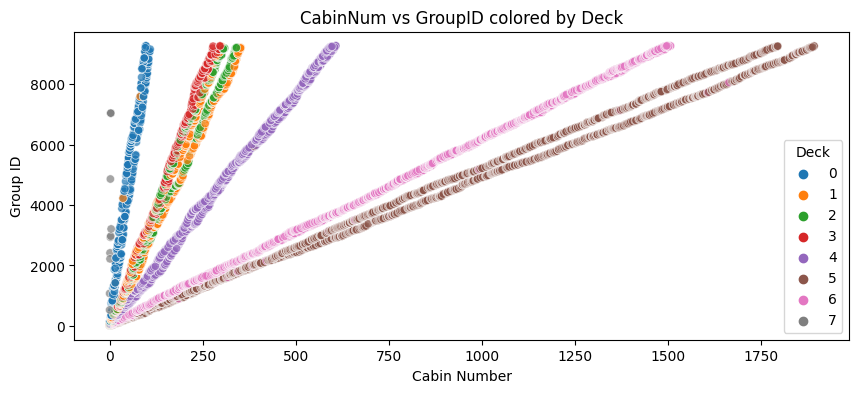

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Encode Cabin_deck values to numeric
label_encoder = LabelEncoder()
data['Deck_encoded'] = label_encoder.fit_transform(data['Deck'].fillna('Unknown'))

# Scatterplot of CabinNum vs GroupID, colored by Deck_encoded
plt.figure(figsize=(10, 4))
sns.scatterplot(x=data['CabinNum'], y=data['GroupID'],
                hue=data['Deck_encoded'], palette='tab10', alpha=0.7)

# Titles and labels
plt.title('CabinNum vs GroupID colored by Deck')
plt.xlabel('Cabin Number')
plt.ylabel('Group ID')
plt.legend(title='Deck', loc='best')
plt.show()


In [75]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Count initial missing values
initial_missing = data['CabinNum'].isna().sum()
print(f'Initial number of missing values in Cabin_number: {initial_missing}')

# Step 2: Loop over each unique Cabin_deck
decks = data['Deck'].unique()
for deck in decks:
    # Filter data for the current deck
    deck_data = data[data['Deck'] == deck]
    
    # Step 3: Identify rows with missing Cabin_number
    missing_data = deck_data[deck_data['CabinNum'].isna()]
    
    # If there are missing values in this deck, proceed
    if not missing_data.empty:
        # Prepare the data for linear regression
        known_data = deck_data.dropna(subset=['CabinNum'])
        X = known_data[['GroupID']]  # GroupID as feature
        y = known_data['CabinNum']   # CabinNum as target
        
        # Initialize and fit the linear regression model
        model = LinearRegression()
        model.fit(X, y)
        
        # Step 4: Predict missing values
        missing_X = missing_data[['GroupID']]
        predicted_values = model.predict(missing_X)
        
        # Fill the missing values with the predicted values
        data.loc[data['CabinNum'].isna() & (data['Deck'] == deck), 'CabinNum'] = predicted_values

# Step 5: Count missing values after filling
final_missing = data['CabinNum'].isna().sum()
print(f'Final number of missing values in Cabin_number: {final_missing}')
print(f'Missing values filled: {initial_missing - final_missing}')


Initial number of missing values in Cabin_number: 299
Final number of missing values in Cabin_number: 0
Missing values filled: 299


## age 

In [76]:
# Define the mapping of HomePlanet and Deck to their respective median Age values
homeplanet_deck_median = {
    'Earth': {'D': 31.0, 'E': 25.0, 'F': 24.0, 'G': 22.0},
    'Europa': {'A': 34.0, 'B': 32.0, 'C': 33.0, 'D': 32.5, 'E': 32.0, 'T': 37.0},
    'Mars': {'D': 31.0, 'E': 28.0, 'F': 27.0}
}

# Function to fill missing Age based on HomePlanet and Deck
def fill_missing_age(row):
    if pd.isna(row['Age']):
        homeplanet = row['HomePlanet']
        deck = row['Deck']
        # If the HomePlanet and Deck combination has a valid median, fill the missing Age
        if deck in homeplanet_deck_median.get(homeplanet, {}):
            return homeplanet_deck_median[homeplanet][deck]
    return row['Age']

# Apply the function to fill missing Age values
data['Age'] = data.apply(fill_missing_age, axis=1)

# Display the updated train_df
display(data)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,...,No_spending,Deck,CabinNum,Side,CabinNumBin,Surname,FamilySize,MissingPctBin,Group_size,Deck_encoded
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,...,1,B,0.000000,P,"(-1.894, 189.4]",Ofracculy,1,0-10%,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,...,0,F,0.000000,S,"(-1.894, 189.4]",Vines,4,0-10%,1,5
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,...,0,A,0.000000,S,"(-1.894, 189.4]",Susent,6,0-10%,2,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,...,0,A,0.000000,S,"(-1.894, 189.4]",Susent,6,0-10%,2,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,...,0,F,1.000000,S,"(-1.894, 189.4]",Santantines,6,0-10%,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,0.0,0.0,0.0,0.0,...,1,G,1496.000000,S,"(1325.8, 1515.2]",Peter,6,0-10%,2,6
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,0.0,847.0,17.0,10.0,...,0,G,1502.581614,z,NaN,Scheron,4,10-20%,1,6
4274,9271_01,Mars,True,D/296/P,55 Cancri e,31.0,0.0,0.0,0.0,0.0,...,1,D,296.000000,P,"(189.4, 378.8]",Pore,1,0-10%,1,3
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,32.5,0.0,2680.0,0.0,0.0,...,0,D,297.000000,P,"(189.4, 378.8]",Conale,2,10-20%,1,3


In [77]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep        310
Cabin            299
Destination        0
Age                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
GroupID            0
IndividualID       0
MemberCount        0
solo               0
age-range        270
Expenditure        0
No_spending        0
Deck               0
CabinNum           0
Side               0
CabinNumBin      299
Surname            0
FamilySize         0
MissingPctBin      0
Group_size         0
Deck_encoded       0
dtype: int64

## Age

In [78]:
# Create the joint distribution
no_spending_vs_cryosleep = data.groupby(['No_spending', 'CryoSleep'])['CryoSleep'].size().unstack(fill_value=0)

# Display the result
display(no_spending_vs_cryosleep)


CryoSleep,False,True
No_spending,,
0,7339,0
1,740,4581


In [79]:
# Store original missing count for CryoSleep
missing_before = data['CryoSleep'].isna().sum()

# Fill missing CryoSleep values using mode from each No_spending group
data['CryoSleep'] = data.groupby('No_spending')['CryoSleep'].transform(
    lambda x: x.fillna(pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else x)
)

# Store updated missing count
missing_after = data['CryoSleep'].isna().sum()

# Report results
print("Missing before:", missing_before)
print("Missing after:", missing_after)


Missing before: 310
Missing after: 0


<ipython-input-79-c1621ba032e0>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  lambda x: x.fillna(pd.Series.mode(x)[0] if not pd.Series.mode(x).empty else x)


In [80]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
GroupID            0
IndividualID       0
MemberCount        0
solo               0
age-range        270
Expenditure        0
No_spending        0
Deck               0
CabinNum           0
Side               0
CabinNumBin      299
Surname            0
FamilySize         0
MissingPctBin      0
Group_size         0
Deck_encoded       0
dtype: int64

## expenditure 

In [81]:
# Target columns with missing values
cols_to_fill = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

# Step 1: Show missing values before
print("Missing values before filling:\n")
print(data[cols_to_fill].isna().sum())

# Step 2: Fill missing values with CryoSleep-grouped means
for col in cols_to_fill:
    data[col] = data.groupby('CryoSleep')[col].transform(lambda x: x.fillna(x.mean()))

# Step 3: Show missing values after
print("\nMissing values after filling:\n")
print(data[cols_to_fill].isna().sum())


Missing values before filling:

RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
dtype: int64

Missing values after filling:

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [82]:
data.isna().sum()

PassengerId        0
HomePlanet         0
CryoSleep          0
Cabin            299
Destination        0
Age                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name             294
GroupID            0
IndividualID       0
MemberCount        0
solo               0
age-range        270
Expenditure        0
No_spending        0
Deck               0
CabinNum           0
Side               0
CabinNumBin      299
Surname            0
FamilySize         0
MissingPctBin      0
Group_size         0
Deck_encoded       0
dtype: int64

## name 

In [83]:
# Fill missing Name values with Surname
data['Name'] = data['Name'].fillna(data['Surname'])

# Confirm it worked
print("Missing values in 'Name' after filling:", data['Name'].isna().sum())


Missing values in 'Name' after filling: 0


## age range 

In [84]:
# Define new binning function
def updated_age_range(age):
    if age <= 12:
        return 'Age_0-12'
    elif age <= 17:
        return 'Age_13-17'
    elif age <= 25:
        return 'Age_18-25'
    elif age <= 30:
        return 'Age_26-30'
    elif age <= 50:
        return 'Age_31-50'
    else:
        return 'Age_51+'

# Apply the function to update the 'age-range' column
data['age-range'] = data['Age'].apply(updated_age_range).astype('category')

# Check result
data[['Age', 'age-range']].head()


,Age,age-range
0,39.0,Age_31-50
1,24.0,Age_18-25
2,58.0,Age_51+
3,33.0,Age_31-50
4,16.0,Age_13-17


In [85]:
data.drop(['Cabin', 'CabinNumBin'], axis=1, inplace=True)


In [86]:
data.drop(['Deck_encoded', 'MissingPctBin'], axis=1, inplace=True)


# preprocessing 

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12970 entries, 0 to 4276
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   PassengerId   12970 non-null  object  
 1   HomePlanet    12970 non-null  object  
 2   CryoSleep     12970 non-null  bool    
 3   Destination   12970 non-null  object  
 4   Age           12970 non-null  float64 
 5   RoomService   12970 non-null  float64 
 6   FoodCourt     12970 non-null  float64 
 7   ShoppingMall  12970 non-null  float64 
 8   Spa           12970 non-null  float64 
 9   VRDeck        12970 non-null  float64 
 10  Name          12970 non-null  object  
 11  GroupID       12970 non-null  int64   
 12  IndividualID  12970 non-null  int64   
 13  MemberCount   12970 non-null  int64   
 14  solo          12970 non-null  int64   
 15  age-range     12970 non-null  category
 16  Expenditure   12970 non-null  float64 
 17  No_spending   12970 non-null  int64   
 18  Deck        

In [88]:
# Use PassengerId from train_target to identify train rows
train_ids = train_target['PassengerId']

# 1. Restore train_df using PassengerId
train_df = data[data['PassengerId'].isin(train_ids)].copy()

# 2. Merge back the Transported column to train_df
train_df = train_df.merge(train_target, on='PassengerId')

# 3. Restore test_df using the remaining PassengerIds
test_df = data[~data['PassengerId'].isin(train_ids)].copy()

# Optional: confirm shapes
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)


train_df shape: (8693, 25)
test_df shape: (4277, 24)


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

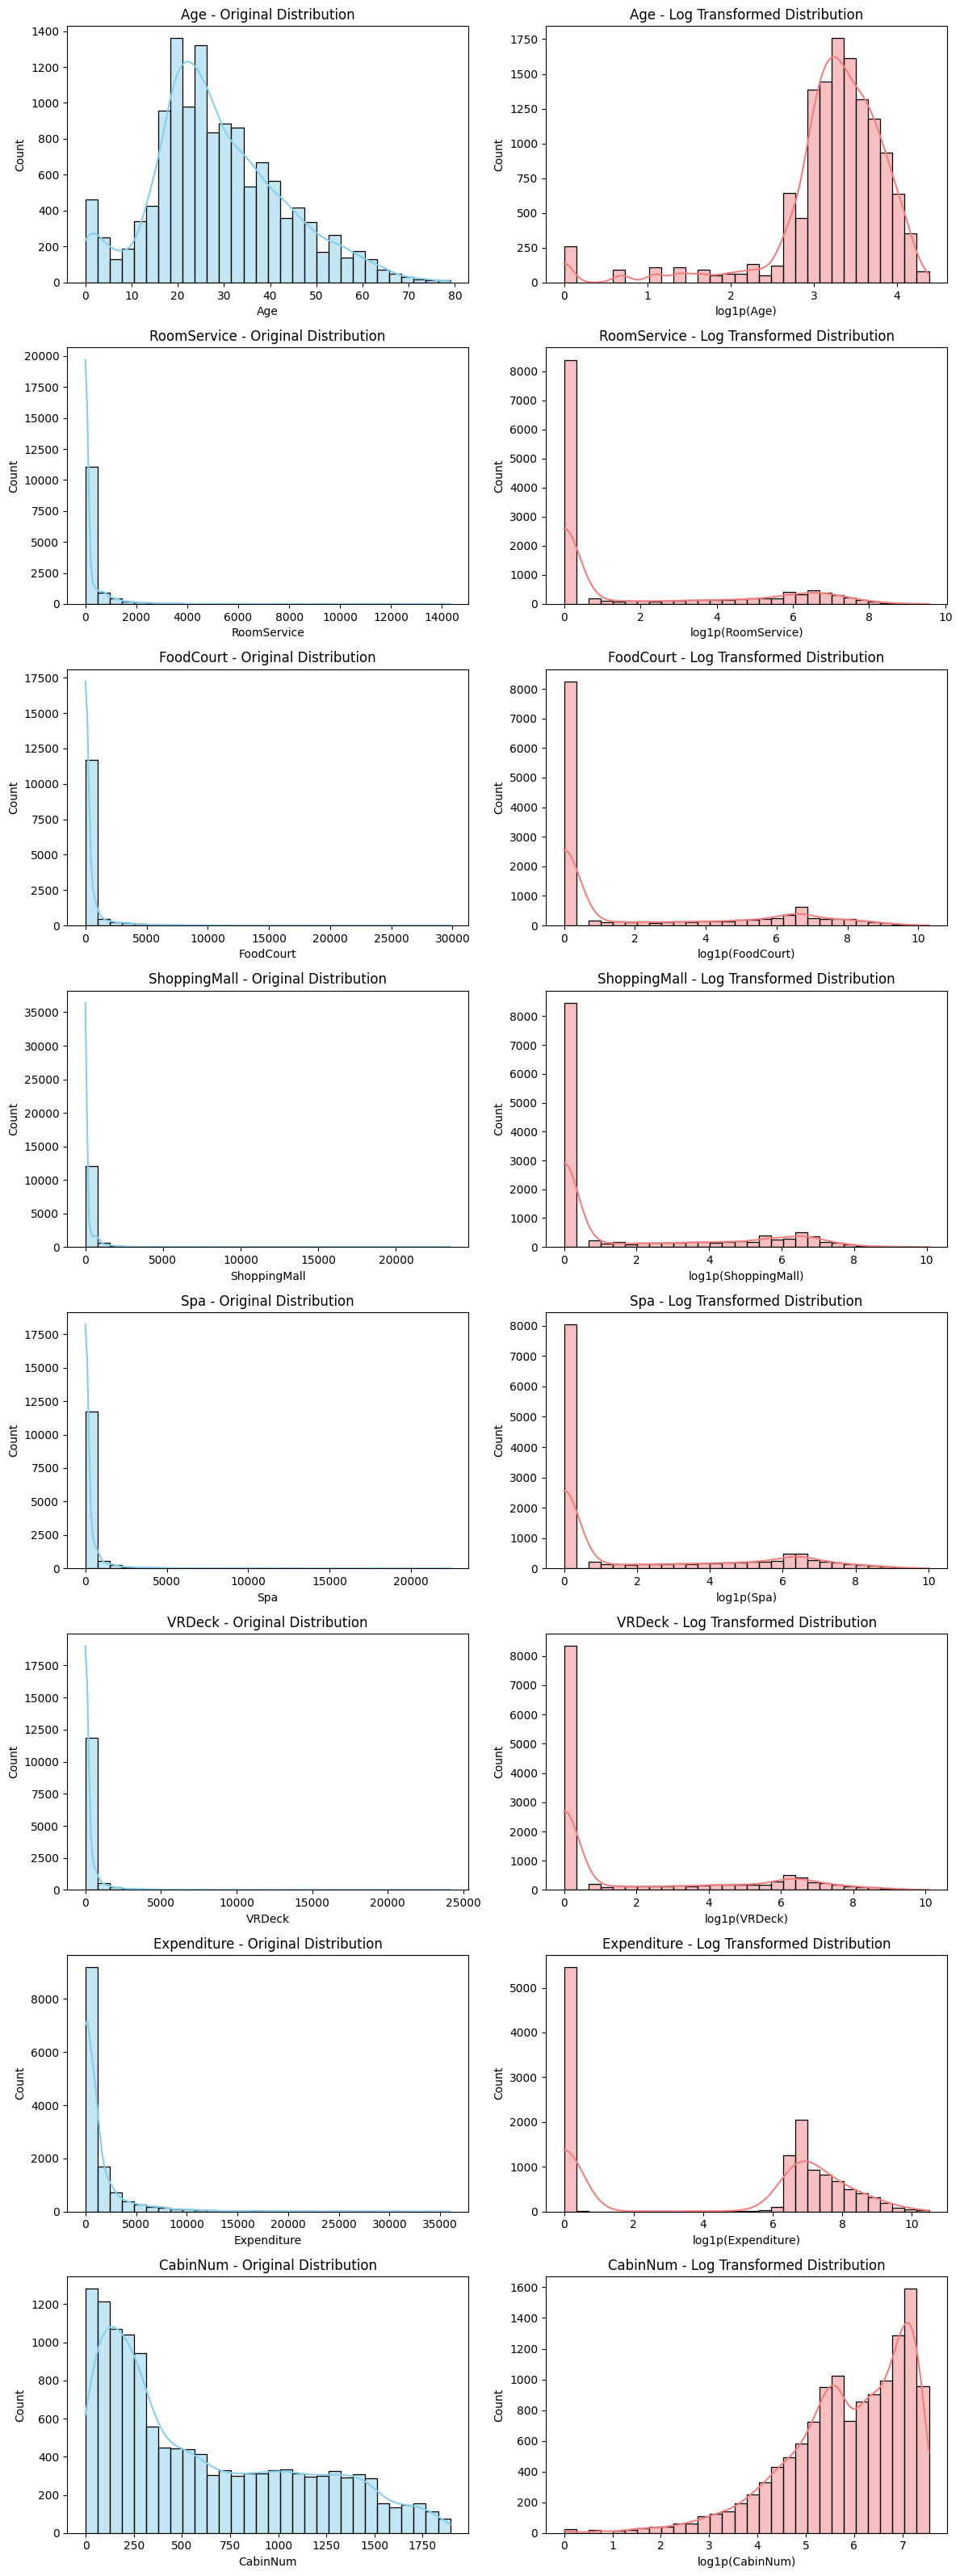

In [89]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Select integer columns (excluding boolean)
int_cols = data.select_dtypes(include='float64').columns

# Set up the plot grid
num_cols = len(int_cols)
plt.figure(figsize=(12, 4 * num_cols))

for i, col in enumerate(int_cols):
    # Histogram - Original
    plt.subplot(num_cols, 2, 2*i + 1)
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'{col} - Original Distribution')
    plt.xlabel(col)
    
    # Histogram - Log Transformed (avoid issues with zero or negative values)
    plt.subplot(num_cols, 2, 2*i + 2)
    log_data = np.log1p(data[col])  # log1p = log(1 + x) safe for zero
    sns.histplot(log_data, kde=True, bins=30, color='lightcoral')
    plt.title(f'{col} - Log Transformed Distribution')
    plt.xlabel(f'log1p({col})')

plt.tight_layout()
plt.show()


In [90]:
passenger_ids = test_df['PassengerId'].copy()

# Columns to drop
cols_to_drop = ['age-range', 'CabinNum', 'GroupID', 'PassengerId', 'Group_size']

# Drop from train_df and test_df
train_df.drop(columns=cols_to_drop, inplace=True)
test_df.drop(columns=cols_to_drop, inplace=True)

# Optional: confirm the shape
print("train_df shape:", train_df.shape)
print("test_df shape:", test_df.shape)


train_df shape: (8693, 20)
test_df shape: (4277, 19)


In [91]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8693 non-null   float64
 4   RoomService   8693 non-null   float64
 5   FoodCourt     8693 non-null   float64
 6   ShoppingMall  8693 non-null   float64
 7   Spa           8693 non-null   float64
 8   VRDeck        8693 non-null   float64
 9   Name          8693 non-null   object 
 10  IndividualID  8693 non-null   int64  
 11  MemberCount   8693 non-null   int64  
 12  solo          8693 non-null   int64  
 13  Expenditure   8693 non-null   float64
 14  No_spending   8693 non-null   int64  
 15  Deck          8693 non-null   object 
 16  Side          8693 non-null   object 
 17  Surname       8693 non-null   object 
 18  FamilySize    8693 non-null 

In [92]:
cols_to_log = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Expenditure']

# Apply log1p (log(1 + x)) to handle zeros
for col in cols_to_log:
    train_df[col] = np.log1p(train_df[col])
    test_df[col] = np.log1p(test_df[col])

# Optional: check summary
print(train_df[cols_to_log].describe())

       RoomService    FoodCourt  ShoppingMall          Spa       VRDeck  \
count  8693.000000  8693.000000   8693.000000  8693.000000  8693.000000   
mean      1.811495     1.991144      1.669847     1.921382     1.843978   
std       2.751535     2.971197      2.599455     2.805267     2.786901   
min       0.000000     0.000000      0.000000     0.000000     0.000000   
25%       0.000000     0.000000      0.000000     0.000000     0.000000   
50%       0.000000     0.000000      0.000000     0.000000     0.000000   
75%       4.127134     4.543295      3.496508     4.317488     4.077537   
max       9.569971    10.302733     10.064458    10.017218    10.091377   

       Expenditure  
count  8693.000000  
mean      4.253005  
std       3.689350  
min       0.000000  
25%       0.000000  
50%       6.575076  
75%       7.273786  
max      10.490941  


In [93]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# 1. Separate features and target
X = train_df.drop(columns=['Transported'])
y = train_df['Transported']
X_test = test_df.copy()

# 2. Identify feature types
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# 3. Define transformers
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse=False))
])

# 4. Create column transformer
ct = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough'  # Keep columns not specified (if any)
)

# 5. Fit and transform the training and test data
X_processed = ct.fit_transform(X)
X_test_processed = ct.transform(X_test)

# 6. Check shapes
print("Processed training data shape:", X_processed.shape)
print("Processed test data shape:", X_test_processed.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Processed training data shape: (8693, 10818)
Processed test data shape: (4277, 10818)


# modeling

In [94]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd

# Define parameter grids for selected models
LR_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.25, 0.5, 1], 
    'max_iter': [50, 100],
    'solver': ['liblinear']
}

KNN_grid = {'n_neighbors': [3, 5, 7], 'p': [1, 2]}

CatBoost_grid = {'n_estimators': [50, 100], 'max_depth': [4, 6], 'learning_rate': [0.05, 0.1]}

NB_grid = {'var_smoothing': [1e-10, 1e-9]}

# Dictionary of all grids (only selected models)
grid = {
    "LogisticRegression": LR_grid,
    "KNN": KNN_grid,
    "CatBoost": CatBoost_grid,
    "NaiveBayes": NB_grid
}

# Define your classifiers dictionary (assuming already imported)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier

classifiers = {
    "LogisticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "NaiveBayes": GaussianNB()
}

# Tuning and evaluation function
def tune_and_evaluate(models, param_grids, X_train, y_train, X_valid, y_valid):
    best_models = {}
    best_parameters = {}
    model_results = []
    
    for model_name, model in models.items():
        print(f"Tuning {model_name}...")
        
        # Calculate the number of possible grid combinations
        n_iter = min(10, len(list(param_grids[model_name].values())[0]))
        
        # Use RandomizedSearchCV
        randomized_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_grids[model_name],
            n_iter=n_iter,
            cv=3,
            n_jobs=-1,
            verbose=1,
            scoring='accuracy',
            random_state=0
        )
        
        randomized_search.fit(X_train, y_train)
        
        best_model = randomized_search.best_estimator_
        best_params = randomized_search.best_params_
        
        y_pred = best_model.predict(X_valid)
        accuracy = accuracy_score(y_valid, y_pred)
        
        best_models[model_name] = best_model
        best_parameters[model_name] = best_params
        model_results.append({"Model": model_name, "Best Parameters": best_params, "Accuracy": accuracy})
    
    model_results_df = pd.DataFrame(model_results)
    return best_models, best_parameters, model_results_df

# Train-test split
X_train, X_valid, y_train, y_valid = train_test_split(X_processed, y, stratify=y, train_size=0.8, test_size=0.2, random_state=0)

# Run tuning
best_models, best_parameters, model_results = tune_and_evaluate(classifiers, grid, X_train, y_train, X_valid, y_valid)

# Show results
print(model_results)


Tuning LogisticRegression...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Tuning KNN...
Fitting 3 folds for each of 3 candidates, totalling 9 fits
Tuning CatBoost...
Fitting 3 folds for each of 2 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Tuning NaiveBayes...
Fitting 3 folds for each of 2 candidates, totalling 6 fits
                Model                                    Best Parameters  \
0  LogisticRegression  {'solver': 'liblinear', 'penalty': 'l1', 'max_...   
1                 KNN                         {'p': 2, 'n_neighbors': 7}   
2            CatBoost  {'n_estimators': 50, 'max_depth': 6, 'learning...   
3          NaiveBayes                           {'var_smoothing': 1e-09}   

   Accuracy  
0  0.773433  
1  0.749281  
2  0.797585  
3  0.523864  


In [95]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Create soft voting ensemble
ensemble = VotingClassifier(
    estimators=[
        ('logreg', best_models['LogisticRegression']),
        ('catboost', best_models['CatBoost'])
    ],
    voting='soft'  # Use soft voting for probability averaging
)

# Train the ensemble
ensemble.fit(X_train, y_train)

# Predict on validation set
ensemble_pred = ensemble.predict(X_valid)

# Evaluate accuracy
ensemble_accuracy = accuracy_score(y_valid, ensemble_pred)
print(f"Ensemble Accuracy (Logistic Regression + CatBoost): {ensemble_accuracy:.6f}")


Ensemble Accuracy (Logistic Regression + CatBoost): 0.796435


# submission

In [96]:
# Use the best CatBoost model to make predictions
test_predictions = best_models["CatBoost"].predict(X_test_processed)

# If you need them as a DataFrame for submission or further use
submission_df = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Transported': test_predictions.astype(bool)
})

print(submission_df.head())


  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01         True


In [97]:
from pathlib import Path

# Save submission to the current working directory
output_path = Path("./submission.csv")
submission_df.to_csv(output_path, index=False)
